In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [47]:
train = pd.read_csv('bigmart/train.csv')
test = pd.read_csv('bigmart/test.csv')

In [48]:
df = pd.read_csv('bigmart/train.csv') 

In [49]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [50]:
df.isna().sum() #bisa dr item type (mean bs)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Dari data diatas bisa dilihat kita mempunyai 3 data yg mempunyai null value, maka bisa kita lihat apakah data angka ada outliers atau tidak. jika ada maka kita bisa menggunakan median untuk fill na, jika tidak kita bs menggunakan mean.
untuk categorikal kita bisa menggunakan modus

In [51]:
df['Item_Weight'].isna().value_counts() 

False    7060
True     1463
Name: Item_Weight, dtype: int64

In [52]:
df['Outlet_Size'].isna().value_counts()

False    6113
True     2410
Name: Outlet_Size, dtype: int64

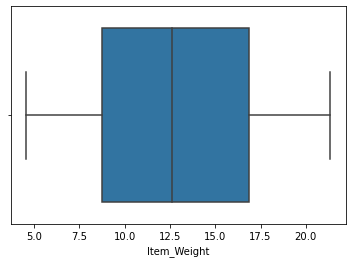

In [54]:
sns.boxplot(df['Item_Weight'])
plt.show()

Dikarenakan data nya itu merupakan berat suatu barang dan tidak ada outliers, maka kita bisa menggunakan rata2 untuk menentukan berat suatu barang yg tidak memiliki value sebelumnya.

In [57]:
df['Item_Weight'][(df['Item_Type']=='Dairy')& (df['Item_Weight'].isna())]= df['Item_Weight'][df['Item_Type']=='Dairy'].mean()

<ipython-input-57-68b715b50ca4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Weight'][(df['Item_Type']=='Dairy')& (df['Item_Weight'].isna())]= df['Item_Weight'][df['Item_Type']=='Dairy'].mean()


In [59]:
df['Item_Weight'][(df['Item_Type']=='Seafood')& (df['Item_Weight'].isna())]

231    NaN
867    NaN
1176   NaN
1575   NaN
1765   NaN
1880   NaN
2265   NaN
4338   NaN
4751   NaN
5187   NaN
6814   NaN
6903   NaN
6986   NaN
Name: Item_Weight, dtype: float64

In [55]:
df['Item_Weight']= df['Item_Weight'].fillna(df['Item_Weight'].mean())

TypeError: Could not convert DairySoft DrinksMeatFruits and VegetablesHouseholdBaking GoodsSnack FoodsSnack FoodsFrozen FoodsFrozen FoodsFruits and VegetablesDairyFruits and VegetablesSnack FoodsFruits and VegetablesBreakfastHealth and HygieneBreakfastHard DrinksDairySnack FoodsBaking GoodsHouseholdBaking GoodsFrozen FoodsHouseholdSnack FoodsHard DrinksDairyCannedDairyHealth and HygieneSnack FoodsBreadsSoft DrinksHealth and HygieneFruits and VegetablesSoft DrinksSnack FoodsSnack FoodsDairyMeatSnack FoodsCannedCannedDairyHealth and HygieneCannedBaking GoodsDairyHealth and HygieneFrozen FoodsCannedFruits and VegetablesHouseholdSnack FoodsHouseholdHard DrinksSnack FoodsCannedFruits and VegetablesMeatFruits and VegetablesFrozen FoodsSnack FoodsSnack FoodsMeatDairySoft DrinksHealth and HygieneSnack FoodsBaking GoodsStarchy FoodsCannedHouseholdFrozen FoodsSnack FoodsBaking GoodsFrozen FoodsCannedSnack FoodsFrozen FoodsSnack FoodsHouseholdBaking GoodsFruits and VegetablesFruits and VegetablesBreakfastSnack FoodsMeatFruits and VegetablesDairySoft DrinksFruits and VegetablesHealth and HygieneFrozen FoodsFrozen FoodsFruits and VegetablesHouseholdFruits and VegetablesFrozen FoodsSnack FoodsSnack FoodsSoft DrinksSnack FoodsCannedBaking GoodsBaking GoodsSoft DrinksSoft DrinksDairyFrozen FoodsMeatSnack FoodsBreadsFrozen FoodsFrozen FoodsSnack FoodsSoft DrinksSnack FoodsHouseholdSoft DrinksCannedCannedBreadsFrozen FoodsSoft DrinksDairyHard DrinksHouseholdCannedHouseholdHealth and HygieneFrozen FoodsCannedHouseholdStarchy FoodsDairyFruits and VegetablesOthersHouseholdHouseholdOthersHouseholdFrozen FoodsFrozen FoodsStarchy FoodsHealth and HygieneSnack FoodsHouseholdSoft DrinksFrozen FoodsFrozen FoodsSoft DrinksFruits and VegetablesHouseholdBaking GoodsBreakfastSoft DrinksFrozen FoodsSnack FoodsFruits and VegetablesCannedSoft DrinksMeatSoft DrinksCannedCannedHouseholdBreadsOthersFruits and VegetablesMeatFruits and VegetablesFruits and VegetablesBreadsStarchy FoodsHealth and HygieneSoft DrinksBaking GoodsFrozen FoodsMeatHealth and HygieneDairyBaking GoodsSnack FoodsFruits and VegetablesHealth and HygieneFrozen FoodsHouseholdMeatSnack FoodsFruits and VegetablesFruits and VegetablesHouseholdFruits and VegetablesFrozen FoodsOthersDairyCannedHealth and HygieneBaking GoodsSnack FoodsBaking GoodsMeatBaking GoodsFrozen FoodsSoft DrinksSnack FoodsFrozen FoodsSoft DrinksDairySnack FoodsHouseholdHouseholdSnack FoodsFruits and VegetablesFrozen FoodsMeatMeatBaking GoodsBaking GoodsFrozen FoodsCannedSoft DrinksOthersFruits and VegetablesDairyCannedCannedHouseholdSeafoodFruits and VegetablesCannedHouseholdHard DrinksSnack FoodsStarchy FoodsSnack FoodsHealth and HygieneHouseholdHouseholdHealth and HygieneFruits and VegetablesDairySnack FoodsCannedFruits and VegetablesMeatFrozen FoodsDairyFruits and VegetablesFruits and VegetablesSnack FoodsFruits and VegetablesFrozen FoodsCannedHealth and HygieneMeatBaking GoodsMeatSoft DrinksFrozen FoodsDairyBreakfastHouseholdFrozen FoodsBaking GoodsStarchy FoodsFrozen FoodsFrozen FoodsDairyFruits and VegetablesDairySnack FoodsMeatFruits and VegetablesMeatSnack FoodsSnack FoodsFruits and VegetablesHouseholdHouseholdSoft DrinksFruits and VegetablesMeatFruits and VegetablesHouseholdFruits and VegetablesHouseholdSoft DrinksBreakfastFruits and VegetablesDairyBaking GoodsBaking GoodsBaking GoodsOthersFruits and VegetablesBaking GoodsCannedFruits and VegetablesHouseholdBreadsSoft DrinksHard DrinksFruits and VegetablesFrozen FoodsBaking GoodsFruits and VegetablesDairyCannedSnack FoodsCannedFrozen FoodsSnack FoodsSnack FoodsFruits and VegetablesFrozen FoodsFruits and VegetablesHard DrinksBaking GoodsSoft DrinksDairyFruits and VegetablesOthersMeatBreadsHealth and HygieneBreadsDairyBaking GoodsFruits and VegetablesSnack FoodsFrozen FoodsBreakfastOthersFruits and VegetablesFrozen FoodsBreakfastCannedBaking GoodsHouseholdHouseholdSnack FoodsSoft DrinksMeatHouseholdHouseholdCannedBreadsBreadsMeatSoft DrinksSnack FoodsCannedDairyMeatFrozen FoodsFruits and VegetablesHard DrinksHealth and HygieneBaking GoodsSnack FoodsDairyFruits and VegetablesFruits and VegetablesMeatDairyFruits and VegetablesFruits and VegetablesHealth and HygieneHouseholdSnack FoodsMeatCannedDairyFruits and VegetablesDairyFrozen FoodsFruits and VegetablesFruits and VegetablesMeatFrozen FoodsFruits and VegetablesSnack FoodsCannedSnack FoodsSnack FoodsSoft DrinksFrozen FoodsFruits and VegetablesFruits and VegetablesDairyHouseholdFruits and VegetablesSnack FoodsStarchy FoodsSnack FoodsHouseholdOthersHealth and HygieneBreadsHealth and HygieneSnack FoodsBaking GoodsSnack FoodsBaking GoodsDairyHard DrinksBaking GoodsHouseholdDairyMeatHouseholdDairyStarchy FoodsBreadsFruits and VegetablesHouseholdFrozen FoodsFrozen FoodsFruits and VegetablesDairyHealth and HygieneFruits and VegetablesMeatFruits and VegetablesFruits and VegetablesDairyBaking GoodsCannedSnack FoodsDairyMeatSoft DrinksHealth and HygieneFrozen FoodsDairyStarchy FoodsStarchy FoodsFruits and VegetablesBreadsHouseholdFrozen FoodsFruits and VegetablesSnack FoodsDairyHealth and HygieneHouseholdBaking GoodsFrozen FoodsCannedFrozen FoodsSnack FoodsHouseholdDairyCannedSoft DrinksHealth and HygieneFruits and VegetablesCannedDairyHouseholdDairyFrozen FoodsHouseholdFrozen FoodsBaking GoodsFrozen FoodsHouseholdBaking GoodsFruits and VegetablesSnack FoodsCannedFrozen FoodsHouseholdMeatBaking GoodsHouseholdSnack FoodsHard DrinksFrozen FoodsCannedSnack FoodsBaking GoodsFruits and VegetablesDairyFruits and VegetablesFrozen FoodsHealth and HygieneBreadsHouseholdSnack FoodsFruits and VegetablesSnack FoodsFrozen FoodsFruits and VegetablesFrozen FoodsHouseholdHouseholdFrozen FoodsDairyDairyFrozen FoodsBaking GoodsFruits and VegetablesHealth and HygieneOthersSoft DrinksBreakfastMeatFrozen FoodsFruits and VegetablesBaking GoodsHard DrinksHouseholdSoft DrinksBaking GoodsHouseholdFrozen FoodsDairyHouseholdFruits and VegetablesHouseholdFruits and VegetablesHealth and HygieneHouseholdFruits and VegetablesFrozen FoodsFrozen FoodsOthersCannedDairyFrozen FoodsFruits and VegetablesFrozen FoodsFruits and VegetablesFrozen FoodsOthersFruits and VegetablesBaking GoodsCannedFrozen FoodsSoft DrinksCannedDairyFrozen FoodsHealth and HygieneFruits and VegetablesSnack FoodsCannedDairyMeatFruits and VegetablesCannedOthersSnack FoodsDairyFruits and VegetablesSoft DrinksDairyFruits and VegetablesSnack FoodsSnack FoodsHard DrinksSnack FoodsBreakfastDairyFruits and VegetablesSnack FoodsHealth and HygieneSnack FoodsFrozen FoodsHard DrinksSnack FoodsSoft DrinksSoft DrinksFruits and VegetablesHouseholdMeatBreakfastFrozen FoodsFruits and VegetablesSnack FoodsSnack FoodsSnack FoodsOthersFruits and VegetablesHealth and HygieneHouseholdCannedHouseholdBaking GoodsHouseholdFruits and VegetablesFrozen FoodsHouseholdSnack FoodsSoft DrinksBaking GoodsSnack FoodsMeatFrozen FoodsHouseholdBaking GoodsCannedSnack FoodsHouseholdCannedStarchy FoodsSnack FoodsHealth and HygieneSnack FoodsStarchy FoodsFruits and VegetablesSnack FoodsHard DrinksDairyFruits and VegetablesCannedBaking GoodsHouseholdBaking GoodsDairyFruits and VegetablesFruits and VegetablesFruits and VegetablesSnack FoodsBreakfastSoft DrinksFruits and VegetablesCannedFrozen FoodsSnack FoodsFruits and VegetablesCannedFruits and VegetablesSnack FoodsDairySnack FoodsMeatSnack FoodsDairyHouseholdCannedHouseholdSoft DrinksFrozen FoodsSnack FoodsFruits and VegetablesFruits and VegetablesCannedDairyFruits and VegetablesHouseholdFruits and VegetablesDairyHouseholdSnack FoodsFruits and VegetablesStarchy FoodsFruits and VegetablesCannedFrozen FoodsHouseholdFruits and VegetablesBreadsCannedMeatHard DrinksMeatDairyFruits and VegetablesHouseholdHealth and HygieneFrozen FoodsHealth and HygieneFruits and VegetablesDairyFruits and VegetablesSnack FoodsCannedMeatFruits and VegetablesSnack FoodsMeatFruits and VegetablesFruits and VegetablesDairyFruits and VegetablesHouseholdSnack FoodsBaking GoodsFruits and VegetablesHouseholdHouseholdHealth and HygieneHouseholdCannedSoft DrinksHouseholdHealth and HygieneHouseholdCannedCannedSnack FoodsHealth and HygieneMeatBaking GoodsHouseholdHouseholdDairySeafoodDairyDairySeafoodOthersFruits and VegetablesHealth and HygieneFrozen FoodsDairyFrozen FoodsFrozen FoodsSnack FoodsCannedDairyFrozen FoodsCannedSnack FoodsDairyMeatHard DrinksBreadsHouseholdSnack FoodsHouseholdSnack FoodsSnack FoodsCannedDairyDairyMeatSnack FoodsHouseholdMeatHard DrinksDairyCannedCannedBreadsFruits and VegetablesFruits and VegetablesDairySoft DrinksDairyFrozen FoodsCannedDairyMeatSnack FoodsFruits and VegetablesMeatHealth and HygieneMeatFruits and VegetablesFrozen FoodsFrozen FoodsFruits and VegetablesOthersCannedSnack FoodsSoft DrinksDairyBaking GoodsFrozen FoodsSoft DrinksCannedFrozen FoodsFruits and VegetablesHouseholdSnack FoodsSnack FoodsSnack FoodsSnack FoodsFruits and VegetablesSnack FoodsMeatDairyCannedHouseholdCannedBreadsHealth and HygieneBreadsCannedFruits and VegetablesFruits and VegetablesBreadsSnack FoodsHealth and HygieneBaking GoodsHouseholdBaking GoodsFruits and VegetablesBaking GoodsHouseholdFruits and VegetablesSnack FoodsBaking GoodsMeatSnack FoodsBreakfastSoft DrinksHouseholdHard DrinksSnack FoodsMeatOthersSnack FoodsHard DrinksBreadsFruits and VegetablesHouseholdFrozen FoodsSnack FoodsSnack FoodsFrozen FoodsStarchy FoodsSoft DrinksHealth and HygieneDairyBaking GoodsSoft DrinksSnack FoodsHouseholdBaking GoodsOthersFruits and VegetablesBaking GoodsFruits and VegetablesMeatDairyHealth and HygieneCannedSnack FoodsSnack FoodsFruits and VegetablesCannedFruits and VegetablesHouseholdDairyCannedFrozen FoodsCannedDairyMeatFruits and VegetablesHard DrinksFruits and VegetablesSnack FoodsHouseholdMeatDairySnack FoodsCannedSeafoodSeafoodHouseholdDairyDairyHealth and HygieneBaking GoodsBreadsSnack FoodsFrozen FoodsFruits and VegetablesFruits and VegetablesBreadsSoft DrinksSnack FoodsMeatHealth and HygieneFrozen FoodsSoft DrinksBreadsDairyDairyHouseholdSnack FoodsFruits and VegetablesSnack FoodsHealth and HygieneFruits and VegetablesSnack FoodsDairyFrozen FoodsFruits and VegetablesMeatHouseholdBaking GoodsBaking GoodsOthersMeatHealth and HygieneFrozen FoodsSoft DrinksHealth and HygieneDairyHouseholdHouseholdFruits and VegetablesBaking GoodsSoft DrinksFruits and VegetablesSoft DrinksCannedFruits and VegetablesMeatBaking GoodsBreakfastFruits and VegetablesHealth and HygieneFruits and VegetablesBaking GoodsHard DrinksBaking GoodsFrozen FoodsFruits and VegetablesFrozen FoodsMeatFruits and VegetablesDairyOthersSnack FoodsSnack FoodsFruits and VegetablesFrozen FoodsCannedHouseholdSoft DrinksFruits and VegetablesMeatFruits and VegetablesSnack FoodsSnack FoodsBreadsFrozen FoodsSnack FoodsHouseholdSnack FoodsFrozen FoodsBreadsBaking GoodsDairyFruits and VegetablesDairyBreakfastBreakfastCannedHouseholdFruits and VegetablesOthersStarchy FoodsMeatSnack FoodsHard DrinksCannedHealth and HygieneSnack FoodsSnack FoodsDairySnack FoodsOthersFruits and VegetablesFruits and VegetablesSnack FoodsHouseholdBreakfastFrozen FoodsSnack FoodsBaking GoodsFruits and VegetablesCannedSnack FoodsSnack FoodsDairyOthersSnack FoodsBaking GoodsHealth and HygieneFruits and VegetablesMeatOthersHard DrinksSnack FoodsHouseholdFrozen FoodsDairyHouseholdFruits and VegetablesFruits and VegetablesSnack FoodsHouseholdDairyCannedSeafoodSnack FoodsCannedDairyCannedFrozen FoodsSnack FoodsBreadsMeatFruits and VegetablesCannedHouseholdCannedFrozen FoodsMeatFruits and VegetablesHouseholdFrozen FoodsHouseholdSnack FoodsHouseholdHealth and HygieneHealth and HygieneCannedCannedFrozen FoodsSnack FoodsCannedFrozen FoodsBreakfastCannedFrozen FoodsMeatHouseholdBreadsFrozen FoodsHouseholdHard DrinksSnack FoodsDairySoft DrinksHard DrinksSnack FoodsFrozen FoodsFrozen FoodsFruits and VegetablesHouseholdSnack FoodsBreadsSnack FoodsDairyFrozen FoodsSnack FoodsStarchy FoodsFruits and VegetablesHard DrinksHouseholdDairyFrozen FoodsHealth and HygieneFruits and VegetablesFruits and VegetablesFrozen FoodsBreakfastHealth and HygieneHouseholdDairyOthersBaking GoodsBaking GoodsCannedBreadsFruits and VegetablesHouseholdStarchy FoodsFruits and VegetablesSoft DrinksDairySoft DrinksDairyHouseholdHouseholdBreakfastHouseholdFrozen FoodsSnack FoodsHouseholdSnack FoodsFruits and VegetablesSnack FoodsBreadsSnack FoodsFrozen FoodsSnack FoodsFruits and VegetablesHouseholdBaking GoodsSoft DrinksHouseholdHouseholdSnack FoodsFruits and VegetablesDairyHealth and HygieneFrozen FoodsBaking GoodsFruits and VegetablesFruits and VegetablesFrozen FoodsHouseholdHouseholdCannedOthersHouseholdHealth and HygieneBaking GoodsSnack FoodsHouseholdCannedBaking GoodsFrozen FoodsHealth and HygieneCannedCannedFrozen FoodsCannedBaking GoodsFruits and VegetablesCannedFrozen FoodsSnack FoodsFruits and VegetablesSnack FoodsCannedHouseholdCannedFrozen FoodsHouseholdSnack FoodsFruits and VegetablesHard DrinksSoft DrinksSoft DrinksBaking GoodsSnack FoodsMeatHouseholdSnack FoodsFruits and VegetablesSnack FoodsOthersMeatSnack FoodsSnack FoodsSnack FoodsHealth and HygieneSnack FoodsBreadsDairyCannedSnack FoodsDairySnack FoodsFruits and VegetablesFruits and VegetablesSnack FoodsHouseholdFruits and VegetablesFrozen FoodsFrozen FoodsSeafoodSoft DrinksFrozen FoodsBaking GoodsDairyMeatFruits and VegetablesSnack FoodsFruits and VegetablesSoft DrinksBaking GoodsOthersCannedHard DrinksDairyDairyHouseholdFrozen FoodsSnack FoodsFruits and VegetablesHealth and HygieneSoft DrinksCannedHealth and HygieneSnack FoodsSnack FoodsSeafoodSnack FoodsSoft DrinksFruits and VegetablesHouseholdDairyHealth and HygieneSnack FoodsHouseholdHealth and HygieneCannedHealth and HygieneOthersCannedHouseholdFruits and VegetablesSoft DrinksDairySoft DrinksOthersSnack FoodsCannedHouseholdFruits and VegetablesSoft DrinksFruits and VegetablesFrozen FoodsHouseholdHouseholdBreadsCannedSnack FoodsSoft DrinksFruits and VegetablesSnack FoodsHard DrinksFruits and VegetablesHouseholdDairySoft DrinksBaking GoodsHard DrinksSnack FoodsSoft DrinksBaking GoodsSnack FoodsFrozen FoodsFruits and VegetablesSnack FoodsHouseholdSoft DrinksSoft DrinksStarchy FoodsFruits and VegetablesHealth and HygieneHealth and HygieneCannedBaking GoodsDairySnack FoodsDairyBreadsDairyHealth and HygieneBreadsHealth and HygieneSnack FoodsSnack FoodsHouseholdFruits and VegetablesHard DrinksFruits and VegetablesSnack FoodsSnack FoodsBaking GoodsFruits and VegetablesFruits and VegetablesFruits and VegetablesFrozen FoodsFruits and VegetablesDairyFrozen FoodsCannedFruits and VegetablesDairyHealth and HygieneSnack FoodsOthersHealth and HygieneBaking GoodsHouseholdStarchy FoodsCannedBaking GoodsFruits and VegetablesFrozen FoodsFrozen FoodsSnack FoodsBaking GoodsHouseholdDairyMeatFruits and VegetablesFrozen FoodsOthersBaking GoodsFruits and VegetablesFrozen FoodsSnack FoodsFrozen FoodsBaking GoodsCannedFrozen FoodsSnack FoodsSnack FoodsSnack FoodsFruits and VegetablesSnack FoodsDairyHealth and HygieneOthersOthersBreadsFruits and VegetablesFrozen FoodsFruits and VegetablesDairyHealth and HygieneCannedHouseholdOthersMeatMeatCannedFruits and VegetablesOthersFruits and VegetablesSoft DrinksSoft DrinksFruits and VegetablesSnack FoodsSnack FoodsSnack FoodsBaking GoodsBaking GoodsCannedFrozen FoodsSnack FoodsHealth and HygieneFruits and VegetablesSnack FoodsDairyFrozen FoodsHouseholdStarchy FoodsBaking GoodsSnack FoodsSnack FoodsSoft DrinksBaking GoodsSnack FoodsFruits and VegetablesSoft DrinksFruits and VegetablesHard DrinksFrozen FoodsSnack FoodsSoft DrinksDairyDairyFruits and VegetablesSoft DrinksMeatFrozen FoodsStarchy FoodsHealth and HygieneDairyMeatMeatHard DrinksHouseholdHouseholdBaking GoodsSnack FoodsFruits and VegetablesHealth and HygieneFruits and VegetablesFruits and VegetablesFrozen FoodsSnack FoodsFruits and VegetablesSoft DrinksSnack FoodsHouseholdSnack FoodsHealth and HygieneBaking GoodsFruits and VegetablesSeafoodSeafoodOthersBaking GoodsFrozen FoodsFruits and VegetablesDairyBaking GoodsDairyFrozen FoodsSnack FoodsSnack FoodsHard DrinksSnack FoodsSoft DrinksCannedMeatMeatDairySnack FoodsFruits and VegetablesCannedHealth and HygieneHouseholdStarchy FoodsStarchy FoodsDairyHealth and HygieneMeatMeatStarchy FoodsSoft DrinksHouseholdSnack FoodsSnack FoodsSnack FoodsBreadsFrozen FoodsSnack FoodsSnack FoodsHealth and HygieneFrozen FoodsSnack FoodsBaking GoodsHouseholdHouseholdSoft DrinksSnack FoodsSnack FoodsFrozen FoodsFruits and VegetablesHouseholdSoft DrinksFruits and VegetablesDairySnack FoodsDairyFruits and VegetablesCannedBaking GoodsSnack FoodsFruits and VegetablesHealth and HygieneSoft DrinksCannedCannedSnack FoodsDairyHouseholdFruits and VegetablesCannedHard DrinksDairyFruits and VegetablesHouseholdFrozen FoodsCannedStarchy FoodsFruits and VegetablesSnack FoodsHouseholdFruits and VegetablesFrozen FoodsFruits and VegetablesHealth and HygieneMeatFruits and VegetablesSnack FoodsSnack FoodsCannedSnack FoodsFruits and VegetablesBreakfastHouseholdBaking GoodsCannedHealth and HygieneFrozen FoodsBaking GoodsFrozen FoodsDairyFruits and VegetablesFruits and VegetablesCannedHouseholdFrozen FoodsDairyBaking GoodsHealth and HygieneFruits and VegetablesSnack FoodsHouseholdFruits and VegetablesFrozen FoodsSnack FoodsSoft DrinksFruits and VegetablesHealth and HygieneHealth and HygieneSnack FoodsBaking GoodsBreakfastFruits and VegetablesFruits and VegetablesHealth and HygieneHouseholdBaking GoodsHouseholdFrozen FoodsStarchy FoodsDairyHouseholdFrozen FoodsHouseholdFruits and VegetablesSnack FoodsHouseholdBaking GoodsSnack FoodsMeatFruits and VegetablesFruits and VegetablesSnack FoodsMeatBaking GoodsFrozen FoodsBaking GoodsHouseholdHouseholdDairyFruits and VegetablesFruits and VegetablesFruits and VegetablesDairyFrozen FoodsSnack FoodsBaking GoodsHealth and HygieneFruits and VegetablesHouseholdSnack FoodsSoft DrinksBreakfastFruits and VegetablesSnack FoodsFrozen FoodsSnack FoodsMeatHouseholdSnack FoodsSnack FoodsMeatFrozen FoodsBreakfastHouseholdSeafoodSnack FoodsMeatHouseholdDairyFrozen FoodsFruits and VegetablesCannedSnack FoodsBreadsCannedSnack FoodsCannedFrozen FoodsDairyBreadsFruits and VegetablesHouseholdBaking GoodsCannedHealth and HygieneFruits and VegetablesHard DrinksFruits and VegetablesFruits and VegetablesSnack FoodsSnack FoodsSoft DrinksDairyFruits and VegetablesHouseholdCannedFruits and VegetablesSnack FoodsBreadsFruits and VegetablesFruits and VegetablesFruits and VegetablesFrozen FoodsBreadsDairyFruits and VegetablesCannedMeatFrozen FoodsDairyBreadsBaking GoodsBaking GoodsFruits and VegetablesHouseholdHard DrinksFrozen FoodsSnack FoodsFruits and VegetablesFrozen FoodsMeatHouseholdStarchy FoodsSnack FoodsFrozen FoodsFruits and VegetablesBaking GoodsSnack FoodsHouseholdHouseholdSnack FoodsSnack FoodsBaking GoodsSnack FoodsMeatDairyDairyDairyStarchy FoodsHouseholdFruits and VegetablesDairyBaking GoodsHouseholdDairyFruits and VegetablesFrozen FoodsFrozen FoodsOthersHouseholdSnack FoodsBaking GoodsFrozen FoodsHealth and HygieneFruits and VegetablesFrozen FoodsSoft DrinksFruits and VegetablesFruits and VegetablesHouseholdFrozen FoodsFrozen FoodsMeatHealth and HygieneHealth and HygieneMeatFruits and VegetablesMeatCannedHouseholdFruits and VegetablesDairyCannedBaking GoodsHard DrinksSoft DrinksFrozen FoodsBaking GoodsBreadsHouseholdFruits and VegetablesHard DrinksSoft DrinksSnack FoodsBreadsDairyHouseholdBaking GoodsBaking GoodsFruits and VegetablesHard DrinksBaking GoodsSnack FoodsSnack FoodsDairySnack FoodsMeatSoft DrinksBaking GoodsCannedSnack FoodsSnack FoodsHealth and HygieneFruits and VegetablesFrozen FoodsHouseholdSnack FoodsSnack FoodsSnack FoodsHouseholdDairyFruits and VegetablesFrozen FoodsBreadsSoft DrinksBaking GoodsSnack FoodsOthersFrozen FoodsFrozen FoodsFruits and VegetablesSnack FoodsMeatHouseholdDairyDairySoft DrinksHouseholdMeatCannedMeatHouseholdFruits and VegetablesOthersSnack FoodsCannedBaking GoodsSnack FoodsMeatHouseholdFrozen FoodsHealth and HygieneBaking GoodsFruits and VegetablesFruits and VegetablesHouseholdBreadsFrozen FoodsBreadsDairyFruits and VegetablesHard DrinksSnack FoodsSnack FoodsSeafoodHouseholdMeatCannedSnack FoodsDairyFruits and VegetablesSnack FoodsHouseholdHard DrinksSnack FoodsSnack FoodsFruits and VegetablesSnack FoodsCannedHard DrinksFrozen FoodsSoft DrinksFrozen FoodsFrozen FoodsCannedStarchy FoodsFruits and VegetablesBaking GoodsSnack FoodsFruits and VegetablesBaking GoodsHouseholdBaking GoodsFrozen FoodsHouseholdSoft DrinksMeatFruits and VegetablesStarchy FoodsFrozen FoodsHealth and HygieneFrozen FoodsFruits and VegetablesSnack FoodsFruits and VegetablesBreakfastSnack FoodsSnack FoodsHouseholdHard DrinksSoft DrinksCannedFrozen FoodsBaking GoodsFrozen FoodsDairyDairyFrozen FoodsFruits and VegetablesFrozen FoodsSnack FoodsHealth and HygieneHouseholdSnack FoodsStarchy FoodsFrozen FoodsSnack FoodsOthersSnack FoodsBreadsFruits and VegetablesFrozen FoodsDairyFrozen FoodsHouseholdSoft DrinksFruits and VegetablesSnack FoodsSnack FoodsHouseholdHouseholdFrozen FoodsFrozen FoodsSoft DrinksDairyFrozen FoodsFruits and VegetablesBreakfastHouseholdHealth and HygieneFruits and VegetablesFruits and VegetablesBaking GoodsHouseholdHealth and HygieneBaking GoodsFrozen FoodsFruits and VegetablesFruits and VegetablesCannedStarchy FoodsFrozen FoodsFruits and VegetablesHealth and HygieneBaking GoodsFruits and VegetablesHouseholdCannedBaking GoodsFruits and VegetablesFrozen FoodsSoft DrinksFruits and VegetablesHouseholdBreadsSoft DrinksFruits and VegetablesFrozen FoodsSoft DrinksSeafoodOthersCannedHard DrinksSeafoodHouseholdSnack FoodsBaking GoodsCannedHealth and HygieneHouseholdCannedFruits and VegetablesSnack FoodsFrozen FoodsFruits and VegetablesHouseholdHealth and HygieneFruits and VegetablesDairyHouseholdFrozen FoodsFrozen FoodsFruits and VegetablesFruits and VegetablesSnack FoodsSnack FoodsBreakfastDairyDairyFruits and VegetablesHouseholdBaking GoodsSoft DrinksFruits and VegetablesHouseholdFruits and VegetablesSnack FoodsSoft DrinksSnack FoodsFrozen FoodsFruits and VegetablesSnack FoodsSnack FoodsDairyCannedFrozen FoodsMeatSnack FoodsFruits and VegetablesSoft DrinksSoft DrinksFrozen FoodsCannedHouseholdSoft DrinksStarchy FoodsDairySnack FoodsStarchy FoodsCannedHouseholdStarchy FoodsBreadsFruits and VegetablesHouseholdBaking GoodsFrozen FoodsHealth and HygieneMeatFruits and VegetablesDairySnack FoodsSnack FoodsFruits and VegetablesCannedHard DrinksFruits and VegetablesHealth and HygieneFrozen FoodsSoft DrinksCannedSnack FoodsHouseholdDairyMeatHouseholdBaking GoodsHouseholdHouseholdMeatSeafoodOthersSoft DrinksBreakfastDairyHouseholdCannedFruits and VegetablesFruits and VegetablesFruits and VegetablesFruits and VegetablesFrozen FoodsDairyStarchy FoodsSnack FoodsSoft DrinksHouseholdSoft DrinksSoft DrinksFrozen FoodsFruits and VegetablesBreadsFruits and VegetablesHealth and HygieneSnack FoodsHard DrinksMeatFruits and VegetablesSnack FoodsCannedBreadsFruits and VegetablesHard DrinksCannedBaking GoodsHealth and HygieneCannedSnack FoodsDairyBaking GoodsBreadsBaking GoodsFruits and VegetablesSnack FoodsFrozen FoodsFrozen FoodsHard DrinksDairyHealth and HygieneHealth and HygieneHealth and HygieneSoft DrinksFrozen FoodsHealth and HygieneMeatFruits and VegetablesFrozen FoodsCannedFruits and VegetablesFrozen FoodsStarchy FoodsBaking GoodsSnack FoodsHouseholdDairyFruits and VegetablesSnack FoodsOthersHealth and HygieneSoft DrinksSnack FoodsHouseholdFrozen FoodsFrozen FoodsBaking GoodsFruits and VegetablesHealth and HygieneFruits and VegetablesOthersSnack FoodsSnack FoodsFrozen FoodsFruits and VegetablesSoft DrinksBaking GoodsSnack FoodsFruits and VegetablesFrozen FoodsHard DrinksSnack FoodsCannedFrozen FoodsFrozen FoodsCannedSoft DrinksBaking GoodsBaking GoodsHouseholdHouseholdCannedHouseholdSnack FoodsHouseholdFrozen FoodsBaking GoodsHealth and HygieneSnack FoodsStarchy FoodsHouseholdSoft DrinksBaking GoodsFruits and VegetablesFruits and VegetablesHealth and HygieneHard DrinksFrozen FoodsFruits and VegetablesBaking GoodsMeatBaking GoodsSnack FoodsSoft DrinksFrozen FoodsFrozen FoodsDairyFrozen FoodsFrozen FoodsFruits and VegetablesHouseholdMeatOthersSnack FoodsBaking GoodsBaking GoodsFrozen FoodsBreadsFrozen FoodsFruits and VegetablesFruits and VegetablesFrozen FoodsFrozen FoodsSnack FoodsDairyHealth and HygieneSoft DrinksHealth and HygieneFrozen FoodsDairyFruits and VegetablesFrozen FoodsHouseholdDairyHouseholdHealth and HygieneDairySnack FoodsHouseholdFruits and VegetablesHouseholdHouseholdCannedCannedSnack FoodsFrozen FoodsSoft DrinksFrozen FoodsCannedCannedDairyDairyFruits and VegetablesHealth and HygieneBaking GoodsHouseholdBaking GoodsHard DrinksBreakfastSoft DrinksHouseholdFrozen FoodsDairyHouseholdHouseholdFrozen FoodsHouseholdDairyHealth and HygieneSnack FoodsStarchy FoodsDairySnack FoodsBaking GoodsSnack FoodsFrozen FoodsDairySnack FoodsOthersCannedSoft DrinksSnack FoodsFrozen FoodsFruits and VegetablesMeatSoft DrinksHard DrinksCannedCannedBreadsHouseholdFrozen FoodsCannedHouseholdDairySnack FoodsBaking GoodsCannedFruits and VegetablesFruits and VegetablesSoft DrinksCannedFruits and VegetablesSnack FoodsDairyCannedFrozen FoodsFrozen FoodsDairyCannedFruits and VegetablesOthersFrozen FoodsFrozen FoodsSnack FoodsCannedFruits and VegetablesFrozen FoodsCannedHouseholdSnack FoodsHouseholdFruits and VegetablesSoft DrinksBreadsSnack FoodsSnack FoodsFrozen FoodsSoft DrinksSoft DrinksHealth and HygieneFruits and VegetablesFruits and VegetablesFruits and VegetablesBaking GoodsFruits and VegetablesSoft DrinksHouseholdDairyFruits and VegetablesBreadsFrozen FoodsCannedMeatBaking GoodsMeatStarchy FoodsCannedBreadsDairySnack FoodsFruits and VegetablesBaking GoodsFrozen FoodsFruits and VegetablesDairySeafoodFrozen FoodsHouseholdHealth and HygieneDairyHouseholdSnack FoodsSnack FoodsFrozen FoodsHard DrinksFrozen FoodsSnack FoodsFruits and VegetablesHouseholdCannedCannedBreakfastHouseholdSnack FoodsBreadsSeafoodSnack FoodsBaking GoodsFruits and VegetablesHouseholdCannedFruits and VegetablesSoft DrinksDairyBaking GoodsSnack FoodsMeatHouseholdFruits and VegetablesFruits and VegetablesBaking GoodsSnack FoodsHouseholdBreakfastFruits and VegetablesHealth and HygieneBreadsHealth and HygieneSoft DrinksSnack FoodsSnack FoodsMeatSoft DrinksSnack FoodsHard DrinksDairyHouseholdBaking GoodsDairyDairySoft DrinksMeatFruits and VegetablesBreadsBaking GoodsFruits and VegetablesCannedFrozen FoodsFruits and VegetablesCannedBaking GoodsBaking GoodsSnack FoodsBreakfastCannedCannedHouseholdOthersHouseholdCannedCannedBaking GoodsHard DrinksFrozen FoodsDairySnack FoodsHealth and HygieneCannedBaking GoodsBaking GoodsHealth and HygieneFruits and VegetablesSnack FoodsFrozen FoodsSnack FoodsFrozen FoodsFruits and VegetablesHealth and HygieneBaking GoodsMeatHard DrinksHealth and HygieneFruits and VegetablesSnack FoodsDairySnack FoodsFruits and VegetablesCannedFrozen FoodsDairyCannedFrozen FoodsFrozen FoodsSnack FoodsMeatMeatFrozen FoodsHard DrinksBaking GoodsStarchy FoodsCannedSnack FoodsBaking GoodsFruits and VegetablesFruits and VegetablesSnack FoodsFruits and VegetablesFruits and VegetablesCannedFruits and VegetablesHouseholdFrozen FoodsHouseholdCannedHard DrinksSnack FoodsBaking GoodsMeatFruits and VegetablesFrozen FoodsHouseholdSnack FoodsSnack FoodsCannedCannedBaking GoodsBaking GoodsStarchy FoodsHouseholdFrozen FoodsFruits and VegetablesSnack FoodsDairyHard DrinksOthersDairyFruits and VegetablesBaking GoodsSnack FoodsBreadsOthersSoft DrinksDairySnack FoodsFruits and VegetablesHouseholdSnack FoodsMeatFrozen FoodsBreadsBaking GoodsDairyHouseholdFrozen FoodsFruits and VegetablesCannedSnack FoodsFrozen FoodsFruits and VegetablesHouseholdDairySnack FoodsHealth and HygieneFrozen FoodsSoft DrinksCannedHealth and HygieneFrozen FoodsHouseholdDairyFruits and VegetablesOthersBreadsFrozen FoodsFruits and VegetablesBreadsFrozen FoodsBaking GoodsSnack FoodsFruits and VegetablesDairyHealth and HygieneSnack FoodsHealth and HygieneFrozen FoodsDairyHouseholdFruits and VegetablesSnack FoodsDairyHealth and HygieneHouseholdMeatFrozen FoodsHouseholdHealth and HygieneFrozen FoodsBaking GoodsCannedFruits and VegetablesSoft DrinksFruits and VegetablesBaking GoodsHouseholdCannedMeatMeatBaking GoodsSnack FoodsSnack FoodsCannedSnack FoodsFruits and VegetablesCannedHouseholdFrozen FoodsHouseholdMeatHouseholdSoft DrinksMeatCannedDairyFrozen FoodsHard DrinksSnack FoodsSoft DrinksSnack FoodsFruits and VegetablesMeatFruits and VegetablesHouseholdHard DrinksOthersFruits and VegetablesOthersDairyFruits and VegetablesBaking GoodsFruits and VegetablesHouseholdFruits and VegetablesBaking GoodsHealth and HygieneFruits and VegetablesSnack FoodsSnack FoodsStarchy FoodsFrozen FoodsSnack FoodsFruits and VegetablesFrozen FoodsSnack FoodsSnack FoodsSnack FoodsSnack FoodsCannedHouseholdSnack FoodsHouseholdMeatMeatSoft DrinksSnack FoodsFrozen FoodsCannedFrozen FoodsFruits and VegetablesSeafoodBaking GoodsFruits and VegetablesHouseholdBreakfastSoft DrinksHouseholdFruits and VegetablesSeafoodSnack FoodsSnack FoodsFrozen FoodsFruits and VegetablesFrozen FoodsSnack FoodsSnack FoodsFrozen FoodsSoft DrinksDairyFruits and VegetablesHouseholdSnack FoodsMeatHealth and HygieneCannedHouseholdHouseholdFrozen FoodsFrozen FoodsCannedFrozen FoodsSnack FoodsHard DrinksHealth and HygieneBaking GoodsSnack FoodsCannedHealth and HygieneSnack FoodsFruits and VegetablesSoft DrinksCannedFruits and VegetablesSnack FoodsFruits and VegetablesSnack FoodsSnack FoodsHard DrinksBreadsCannedHouseholdHealth and HygieneFruits and VegetablesSoft DrinksSnack FoodsSnack FoodsFrozen FoodsFrozen FoodsFrozen FoodsHouseholdSnack FoodsBaking GoodsHouseholdSoft DrinksFrozen FoodsHouseholdFrozen FoodsCannedBreadsHard DrinksBaking GoodsDairyDairyFrozen FoodsBaking GoodsSeafoodCannedFruits and VegetablesSoft DrinksCannedFruits and VegetablesSnack FoodsHealth and HygieneSnack FoodsHouseholdSnack FoodsFrozen FoodsMeatSoft DrinksCannedFruits and VegetablesHouseholdDairyMeatFrozen FoodsSnack FoodsBaking GoodsCannedDairyFrozen FoodsBreadsSnack FoodsDairySnack FoodsCannedBaking GoodsDairyMeatSnack FoodsFrozen FoodsFrozen FoodsFruits and VegetablesSoft DrinksBreadsOthersDairyFrozen FoodsHouseholdHealth and HygieneBreadsFruits and VegetablesHealth and HygieneCannedFruits and VegetablesSnack FoodsDairyFrozen FoodsFruits and VegetablesFruits and VegetablesSoft DrinksBaking GoodsHouseholdFrozen FoodsSnack FoodsHouseholdBreadsBaking GoodsSnack FoodsSnack FoodsStarchy FoodsFrozen FoodsBaking GoodsSnack FoodsSoft DrinksHouseholdBaking GoodsFrozen FoodsOthersHard DrinksCannedMeatHouseholdCannedHouseholdHouseholdCannedCannedSnack FoodsSnack FoodsHealth and HygieneDairyHouseholdHealth and HygieneHouseholdBreadsFruits and VegetablesDairyHealth and HygieneHouseholdDairySoft DrinksSoft DrinksFruits and VegetablesHouseholdMeatBreadsFruits and VegetablesHard DrinksSnack FoodsFrozen FoodsHouseholdFruits and VegetablesFruits and VegetablesHouseholdFruits and VegetablesSnack FoodsCannedBreadsSnack FoodsDairyFrozen FoodsFruits and VegetablesBreadsDairySnack FoodsCannedSoft DrinksMeatCannedFrozen FoodsSeafoodFrozen FoodsBaking GoodsHouseholdStarchy FoodsSoft DrinksMeatHouseholdStarchy FoodsSnack FoodsMeatMeatFruits and VegetablesFruits and VegetablesHealth and HygieneBreadsHouseholdBaking GoodsBaking GoodsCannedSnack FoodsHouseholdBaking GoodsBaking GoodsHouseholdMeatCannedFrozen FoodsFrozen FoodsBaking GoodsFruits and VegetablesHouseholdDairySeafoodHouseholdSnack FoodsCannedFrozen FoodsSoft DrinksSeafoodFruits and VegetablesFruits and VegetablesFruits and VegetablesMeatSoft DrinksDairyHouseholdFruits and VegetablesBaking GoodsHealth and HygieneDairyHealth and HygieneFrozen FoodsSoft DrinksFruits and VegetablesHouseholdFruits and VegetablesSnack FoodsCannedSoft DrinksCannedSoft DrinksHouseholdHouseholdOthersFrozen FoodsSoft DrinksBaking GoodsSoft DrinksSoft DrinksSnack FoodsHouseholdFruits and VegetablesStarchy FoodsCannedMeatHouseholdBaking GoodsHealth and HygieneHouseholdFruits and VegetablesFrozen FoodsFrozen FoodsHard DrinksBaking GoodsHard DrinksCannedBaking GoodsHealth and HygieneDairyBaking GoodsDairyFruits and VegetablesCannedFruits and VegetablesHouseholdBaking GoodsFrozen FoodsFruits and VegetablesSoft DrinksFruits and VegetablesFruits and VegetablesHealth and HygieneBaking GoodsFrozen FoodsFrozen FoodsFruits and VegetablesBaking GoodsBreadsFruits and VegetablesFrozen FoodsHouseholdCannedBaking GoodsOthersBreakfastFrozen FoodsFrozen FoodsHouseholdFrozen FoodsHealth and HygieneMeatFrozen FoodsSnack FoodsFruits and VegetablesSeafoodHealth and HygieneHouseholdBreakfastSnack FoodsFruits and VegetablesFruits and VegetablesBaking GoodsFrozen FoodsFruits and VegetablesFrozen FoodsDairyMeatDairyFruits and VegetablesDairyFruits and VegetablesSnack FoodsFruits and VegetablesHealth and HygieneHealth and HygieneBaking GoodsSnack FoodsBaking GoodsFruits and VegetablesSoft DrinksSoft DrinksFrozen FoodsCannedSoft DrinksDairyFrozen FoodsFrozen FoodsMeatCannedFruits and VegetablesDairyCannedHard DrinksHealth and HygieneSnack FoodsFruits and VegetablesMeatSnack FoodsBaking GoodsHouseholdHouseholdCannedFruits and VegetablesHouseholdFrozen FoodsStarchy FoodsFruits and VegetablesHealth and HygieneHouseholdFruits and VegetablesFruits and VegetablesCannedHouseholdCannedFruits and VegetablesDairyCannedSnack FoodsHard DrinksFruits and VegetablesSnack FoodsSnack FoodsHouseholdHealth and HygieneSoft DrinksBaking GoodsHouseholdMeatSoft DrinksFrozen FoodsMeatMeatHouseholdFruits and VegetablesSnack FoodsHouseholdHealth and HygieneFruits and VegetablesFruits and VegetablesFruits and VegetablesHouseholdFruits and VegetablesHouseholdBaking GoodsDairySoft DrinksMeatFruits and VegetablesBaking GoodsFruits and VegetablesFruits and VegetablesDairyCannedSoft DrinksFruits and VegetablesFrozen FoodsFrozen FoodsCannedHealth and HygieneSoft DrinksSnack FoodsHouseholdSoft DrinksSnack FoodsMeatDairySnack FoodsBaking GoodsSnack FoodsFruits and VegetablesFruits and VegetablesCannedFruits and VegetablesSoft DrinksBaking GoodsSnack FoodsSnack FoodsHouseholdHouseholdFruits and VegetablesHealth and HygieneDairyBaking GoodsSnack FoodsFruits and VegetablesFrozen FoodsBaking GoodsFrozen FoodsHouseholdFrozen FoodsSnack FoodsSnack FoodsSnack FoodsOthersBaking GoodsFrozen FoodsFrozen FoodsBaking GoodsSnack FoodsSoft DrinksCannedSnack FoodsCannedBreadsCannedSnack FoodsSoft DrinksSnack FoodsBaking GoodsMeatDairyCannedBaking GoodsMeatHealth and HygieneFrozen FoodsHouseholdCannedHealth and HygieneCannedSnack FoodsSoft DrinksSnack FoodsFrozen FoodsDairyHealth and HygieneBaking GoodsHealth and HygieneSoft DrinksSnack FoodsBaking GoodsSnack FoodsHouseholdFruits and VegetablesFrozen FoodsFrozen FoodsSnack FoodsSeafoodSoft DrinksHealth and HygieneHealth and HygieneCannedBaking GoodsSnack FoodsDairyDairyFrozen FoodsFrozen FoodsFrozen FoodsDairyDairySnack FoodsHard DrinksDairyHealth and HygieneFrozen FoodsBaking GoodsBaking GoodsCannedHouseholdCannedHouseholdCannedHard DrinksBaking GoodsHealth and HygieneSnack FoodsSnack FoodsSnack FoodsBaking GoodsSoft DrinksSnack FoodsFrozen FoodsBaking GoodsFrozen FoodsDairyBaking GoodsFruits and VegetablesSoft DrinksBaking GoodsHard DrinksFrozen FoodsDairyMeatDairyCannedDairyBaking GoodsHard DrinksSnack FoodsFruits and VegetablesBreakfastHealth and HygieneHouseholdBaking GoodsSoft DrinksSnack FoodsMeatHouseholdDairySnack FoodsSnack FoodsHealth and HygieneHard DrinksSoft DrinksHealth and HygieneSnack FoodsCannedFruits and VegetablesCannedStarchy FoodsMeatFrozen FoodsBaking GoodsBreadsFruits and VegetablesBaking GoodsSoft DrinksBreadsHard DrinksSoft DrinksMeatOthersDairyDairyFrozen FoodsHouseholdFrozen FoodsHard DrinksFrozen FoodsBaking GoodsCannedHouseholdSnack FoodsCannedOthersCannedMeatCannedBaking GoodsFruits and VegetablesBaking GoodsFrozen FoodsSoft DrinksOthersBreakfastFrozen FoodsSoft DrinksFruits and VegetablesDairyFruits and VegetablesDairyHouseholdFruits and VegetablesFrozen FoodsSnack FoodsSnack FoodsHouseholdFruits and VegetablesBaking GoodsBaking GoodsOthersSoft DrinksMeatSnack FoodsBreadsMeatSnack FoodsDairyHealth and HygieneFrozen FoodsCannedBaking GoodsMeatSnack FoodsCannedStarchy FoodsSnack FoodsCannedFrozen FoodsHouseholdBreadsCannedDairySnack FoodsHard DrinksStarchy FoodsSnack FoodsMeatHard DrinksBaking GoodsSnack FoodsHouseholdHouseholdBreadsFrozen FoodsSnack FoodsFruits and VegetablesFruits and VegetablesDairyBreadsCannedFruits and VegetablesBaking GoodsDairyMeatHouseholdSnack FoodsSnack FoodsStarchy FoodsSnack FoodsSnack FoodsStarchy FoodsFruits and VegetablesFruits and VegetablesFrozen FoodsHouseholdSoft DrinksBaking GoodsHouseholdCannedHouseholdFruits and VegetablesFrozen FoodsFruits and VegetablesHouseholdStarchy FoodsMeatHouseholdCannedFruits and VegetablesFruits and VegetablesMeatFruits and VegetablesFrozen FoodsHouseholdMeatCannedHouseholdHealth and HygieneBaking GoodsBaking GoodsFruits and VegetablesSnack FoodsBaking GoodsHealth and HygieneCannedStarchy FoodsFrozen FoodsCannedStarchy FoodsDairyCannedBaking GoodsHealth and HygieneHouseholdCannedMeatFruits and VegetablesHealth and HygieneOthersFrozen FoodsFrozen FoodsHouseholdSnack FoodsFrozen FoodsSnack FoodsSnack FoodsMeatBreadsBreadsHard DrinksDairyMeatBaking GoodsHouseholdHealth and HygieneBreadsSnack FoodsDairyMeatFruits and VegetablesHouseholdSoft DrinksSnack FoodsStarchy FoodsSnack FoodsDairyFruits and VegetablesOthersSoft DrinksHouseholdFruits and VegetablesHouseholdFruits and VegetablesFrozen FoodsDairyHard DrinksFruits and VegetablesHealth and HygieneBreadsDairyDairySoft DrinksHealth and HygieneSnack FoodsStarchy FoodsSnack FoodsSoft DrinksHouseholdDairySoft DrinksHouseholdCannedFruits and VegetablesFruits and VegetablesBaking GoodsFruits and VegetablesFruits and VegetablesFruits and VegetablesStarchy FoodsFruits and VegetablesHealth and HygieneSnack FoodsSnack FoodsDairyCannedSnack FoodsSnack FoodsBreakfastHouseholdFruits and VegetablesFrozen FoodsCannedMeatHouseholdFruits and VegetablesStarchy FoodsFruits and VegetablesFruits and VegetablesSoft DrinksSoft DrinksBaking GoodsFruits and VegetablesSnack FoodsFruits and VegetablesFruits and VegetablesFruits and VegetablesFruits and VegetablesSnack FoodsOthersSnack FoodsHealth and HygieneMeatFrozen FoodsBaking GoodsFruits and VegetablesSoft DrinksStarchy FoodsBaking GoodsHouseholdFruits and VegetablesFrozen FoodsFruits and VegetablesHealth and HygieneSnack FoodsBreadsFruits and VegetablesSnack FoodsMeatHealth and HygieneFruits and VegetablesDairySnack FoodsHouseholdSoft DrinksBaking GoodsSnack FoodsFrozen FoodsCannedFruits and VegetablesFrozen FoodsSnack FoodsSnack FoodsHealth and HygieneFrozen FoodsFruits and VegetablesCannedOthersFrozen FoodsFruits and VegetablesBaking GoodsFrozen FoodsBaking GoodsFruits and VegetablesFrozen FoodsFruits and VegetablesHouseholdMeatHouseholdCannedStarchy FoodsMeatHealth and HygieneFrozen FoodsBreadsBaking GoodsBreadsHouseholdHouseholdBaking GoodsFrozen FoodsBreadsCannedHouseholdDairySnack FoodsDairySnack FoodsSoft DrinksSnack FoodsSnack FoodsMeatHouseholdCannedSnack FoodsHealth and HygieneHealth and HygieneFruits and VegetablesHouseholdFrozen FoodsFruits and VegetablesHealth and HygieneBaking GoodsSoft DrinksMeatCannedBreakfastSoft DrinksSoft DrinksBaking GoodsFrozen FoodsFruits and VegetablesSnack FoodsFrozen FoodsMeatHouseholdHouseholdSnack FoodsSnack FoodsBaking GoodsHouseholdDairyHealth and HygieneFruits and VegetablesCannedFrozen FoodsSnack FoodsSnack FoodsFrozen FoodsSnack FoodsDairyDairySnack FoodsFruits and VegetablesSnack FoodsSoft DrinksSnack FoodsBaking GoodsHealth and HygieneFruits and VegetablesBaking GoodsHealth and HygieneFruits and VegetablesHouseholdBaking GoodsSnack FoodsCannedHouseholdSnack FoodsCannedBreadsHouseholdFruits and VegetablesMeatHouseholdOthersHard DrinksFrozen FoodsSnack FoodsFrozen FoodsOthersDairySeafoodMeatBreadsDairyDairyHealth and HygieneSnack FoodsFruits and VegetablesHealth and HygieneFruits and VegetablesHouseholdSnack FoodsSnack FoodsSnack FoodsFrozen FoodsDairyHealth and HygieneFruits and VegetablesHouseholdHouseholdFruits and VegetablesStarchy FoodsFruits and VegetablesMeatHouseholdFrozen FoodsHouseholdSnack FoodsDairySnack FoodsFruits and VegetablesFruits and VegetablesBaking GoodsBaking GoodsSeafoodBaking GoodsFrozen FoodsOthersStarchy FoodsHouseholdCannedDairyBreadsBreadsHouseholdSnack FoodsBaking GoodsSoft DrinksHard DrinksFruits and VegetablesHealth and HygieneSnack FoodsHouseholdFrozen FoodsOthersBreakfastFruits and VegetablesOthersHard DrinksHouseholdDairyBreadsFruits and VegetablesSnack FoodsCannedCannedBaking GoodsCannedFrozen FoodsSnack FoodsHouseholdFrozen FoodsHouseholdFruits and VegetablesFruits and VegetablesFruits and VegetablesFrozen FoodsSnack FoodsBreadsSoft DrinksMeatBaking GoodsCannedFrozen FoodsHouseholdDairyCannedHealth and HygieneFruits and VegetablesBaking GoodsFruits and VegetablesBreadsSnack FoodsCannedHouseholdHard DrinksBaking GoodsFruits and VegetablesFruits and VegetablesFrozen FoodsSnack FoodsDairySoft DrinksSoft DrinksBreakfastSoft DrinksHouseholdHouseholdFruits and VegetablesStarchy FoodsBaking GoodsBreadsFruits and VegetablesFruits and VegetablesFruits and VegetablesFrozen FoodsFrozen FoodsCannedFruits and VegetablesHouseholdHouseholdHouseholdFrozen FoodsFrozen FoodsFruits and VegetablesFruits and VegetablesSnack FoodsFruits and VegetablesHouseholdFruits and VegetablesMeatHouseholdCannedSoft DrinksHouseholdFrozen FoodsDairyMeatDairyBaking GoodsMeatCannedDairyOthersBaking GoodsBaking GoodsSeafoodHealth and HygieneBaking GoodsBaking GoodsSnack FoodsBaking GoodsHealth and HygieneFruits and VegetablesBaking GoodsMeatMeatBaking GoodsBreadsFruits and VegetablesCannedFrozen FoodsFruits and VegetablesFrozen FoodsBaking GoodsHouseholdCannedBaking GoodsSoft DrinksSnack FoodsHouseholdBreadsDairyHealth and HygieneSnack FoodsFrozen FoodsHealth and HygieneHouseholdBaking GoodsHard DrinksHard DrinksBreakfastFrozen FoodsSnack FoodsDairySnack FoodsMeatFruits and VegetablesMeatBaking GoodsSnack FoodsBreakfastDairyHouseholdSnack FoodsSoft DrinksHealth and HygieneFrozen FoodsCannedBaking GoodsSnack FoodsHouseholdDairyHouseholdOthersFruits and VegetablesFrozen FoodsSeafoodCannedHealth and HygieneBaking GoodsSnack FoodsSnack FoodsMeatHard DrinksCannedFruits and VegetablesFrozen FoodsFruits and VegetablesFruits and VegetablesBaking GoodsDairyCannedSnack FoodsCannedDairySnack FoodsDairyHouseholdSnack FoodsCannedSnack FoodsSnack FoodsDairySnack FoodsMeatDairySnack FoodsHard DrinksFruits and VegetablesHealth and HygieneSoft DrinksHouseholdSnack FoodsHouseholdMeatFrozen FoodsHouseholdBreadsFruits and VegetablesFruits and VegetablesHealth and HygieneFruits and VegetablesFrozen FoodsFruits and VegetablesFruits and VegetablesSnack FoodsDairyHouseholdHard DrinksSnack FoodsDairySnack FoodsMeatFruits and VegetablesBreadsSnack FoodsSnack FoodsSnack FoodsMeatFrozen FoodsHealth and HygieneMeatHealth and HygieneDairyBreakfastFruits and VegetablesBreadsHouseholdFruits and VegetablesMeatMeatHealth and HygieneHouseholdSnack FoodsSnack FoodsBaking GoodsCannedMeatDairyFrozen FoodsFruits and VegetablesSnack FoodsHealth and HygieneFruits and VegetablesSnack FoodsFruits and VegetablesBaking GoodsFrozen FoodsSnack FoodsSnack FoodsBaking GoodsMeatFruits and VegetablesSoft DrinksSnack FoodsHouseholdFrozen FoodsSnack FoodsMeatHouseholdHouseholdCannedBaking GoodsDairyHouseholdFrozen FoodsSnack FoodsHouseholdBaking GoodsHouseholdBreadsCannedCannedSoft DrinksFruits and VegetablesCannedCannedSnack FoodsDairyFruits and VegetablesCannedFruits and VegetablesFruits and VegetablesHealth and HygieneSnack FoodsSnack FoodsSnack FoodsCannedBreadsDairyBaking GoodsCannedHouseholdHouseholdBaking GoodsDairySoft DrinksSnack FoodsBaking GoodsHouseholdSnack FoodsFruits and VegetablesBreadsHouseholdHealth and HygieneFrozen FoodsCannedDairyStarchy FoodsSoft DrinksFrozen FoodsBreakfastFrozen FoodsMeatFruits and VegetablesDairyFrozen FoodsSoft DrinksFruits and VegetablesHard DrinksHouseholdFrozen FoodsBreakfastHealth and HygieneDairyBreakfastCannedHouseholdOthersFruits and VegetablesFruits and VegetablesSnack FoodsDairyHouseholdBaking GoodsFruits and VegetablesDairyCannedBaking GoodsDairyFruits and VegetablesMeatFrozen FoodsBreadsDairyFrozen FoodsFrozen FoodsHealth and HygieneHouseholdFruits and VegetablesFrozen FoodsFruits and VegetablesHealth and HygieneBreadsFruits and VegetablesMeatFrozen FoodsFruits and VegetablesSnack FoodsSnack FoodsDairyOthersHard DrinksFruits and VegetablesSnack FoodsSnack FoodsBreakfastHealth and HygieneSnack FoodsStarchy FoodsFruits and VegetablesFruits and VegetablesSnack FoodsBreadsFruits and VegetablesOthersFruits and VegetablesStarchy FoodsDairyHealth and HygieneHouseholdMeatSnack FoodsOthersSoft DrinksCannedDairyBaking GoodsDairyBreakfastFruits and VegetablesHealth and HygieneHouseholdDairyFrozen FoodsCannedBreakfastDairyFruits and VegetablesBaking GoodsHealth and HygieneFrozen FoodsFruits and VegetablesDairySoft DrinksDairyBreadsBreakfastFruits and VegetablesFruits and VegetablesHouseholdHouseholdHouseholdHard DrinksFrozen FoodsFruits and VegetablesHealth and HygieneSoft DrinksSoft DrinksSoft DrinksMeatHealth and HygieneHard DrinksFruits and VegetablesBreadsCannedFruits and VegetablesBaking GoodsMeatSoft DrinksBreakfastDairySnack FoodsFruits and VegetablesStarchy FoodsCannedFruits and VegetablesHard DrinksSoft DrinksDairyMeatDairyDairyHouseholdCannedHard DrinksHard DrinksHard DrinksFruits and VegetablesSnack FoodsDairyFrozen FoodsSnack FoodsDairyFruits and VegetablesHouseholdFruits and VegetablesSnack FoodsHealth and HygieneSnack FoodsHard DrinksFruits and VegetablesCannedFruits and VegetablesSnack FoodsFrozen FoodsBaking GoodsSnack FoodsFrozen FoodsSnack FoodsCannedSnack FoodsBreadsFrozen FoodsCannedFruits and VegetablesSnack FoodsHouseholdCannedSnack FoodsHouseholdHealth and HygieneHouseholdSnack FoodsDairyDairyStarchy FoodsFruits and VegetablesMeatCannedFruits and VegetablesHard DrinksHard DrinksSnack FoodsFrozen FoodsBreadsFruits and VegetablesHouseholdSnack FoodsFruits and VegetablesStarchy FoodsFruits and VegetablesFrozen FoodsHouseholdBaking GoodsMeatCannedMeatFrozen FoodsBaking GoodsFruits and VegetablesMeatHouseholdHouseholdHouseholdHealth and HygieneBreadsHouseholdOthersBaking GoodsHealth and HygieneBaking GoodsBreadsHard DrinksSnack FoodsDairyBaking GoodsSnack FoodsSnack FoodsFrozen FoodsFrozen FoodsFrozen FoodsFruits and VegetablesDairySnack FoodsSnack FoodsDairyFrozen FoodsCannedBaking GoodsStarchy FoodsSnack FoodsFrozen FoodsBreadsFrozen FoodsMeatSnack FoodsHouseholdHouseholdFruits and VegetablesDairyBreadsStarchy FoodsFruits and VegetablesFruits and VegetablesDairyFruits and VegetablesMeatDairyFruits and VegetablesBaking GoodsMeatFrozen FoodsHard DrinksCannedFruits and VegetablesOthersSnack FoodsDairyHealth and HygieneHealth and HygieneCannedFruits and VegetablesFruits and VegetablesFruits and VegetablesHealth and HygieneHouseholdSnack FoodsCannedHouseholdDairyDairyStarchy FoodsStarchy FoodsCannedHealth and HygieneFrozen FoodsSoft DrinksDairyHouseholdMeatHouseholdSoft DrinksDairyBreadsCannedFrozen FoodsBaking GoodsSoft DrinksFrozen FoodsFruits and VegetablesDairyFrozen FoodsSoft DrinksFrozen FoodsSnack FoodsSnack FoodsFruits and VegetablesSeafoodMeatBaking GoodsFrozen FoodsDairyStarchy FoodsFrozen FoodsFrozen FoodsDairyFrozen FoodsHard DrinksSnack FoodsSnack FoodsHouseholdSnack FoodsCannedFrozen FoodsCannedHard DrinksSnack FoodsHouseholdHouseholdHouseholdBaking GoodsSnack FoodsCannedStarchy FoodsBreadsFruits and VegetablesBaking GoodsCannedSnack FoodsDairyMeatBreakfastHealth and HygieneDairyFrozen FoodsFruits and VegetablesHouseholdHard DrinksBaking GoodsSoft DrinksCannedDairyFrozen FoodsBaking GoodsSnack FoodsBaking GoodsHouseholdCannedMeatSnack FoodsSeafoodFruits and VegetablesDairySoft DrinksFruits and VegetablesSnack FoodsHouseholdMeatFruits and VegetablesFrozen FoodsDairyFruits and VegetablesCannedHard DrinksSoft DrinksSnack FoodsBreadsSnack FoodsFruits and VegetablesHouseholdDairyBreakfastFruits and VegetablesSnack FoodsDairyFrozen FoodsHard DrinksSnack FoodsMeatHouseholdCannedDairySnack FoodsMeatDairyHouseholdOthersSoft DrinksSnack FoodsFruits and VegetablesOthersSnack FoodsSnack FoodsHouseholdSnack FoodsMeatFrozen FoodsMeatOthersFruits and VegetablesMeatHealth and HygieneOthersFruits and VegetablesCannedBreadsSnack FoodsBaking GoodsFruits and VegetablesMeatOthersFrozen FoodsCannedHouseholdHouseholdHouseholdBaking GoodsSeafoodBaking GoodsSoft DrinksBreadsSnack FoodsSoft DrinksHouseholdDairySoft DrinksHealth and HygieneSnack FoodsHealth and HygieneFruits and VegetablesMeatSoft DrinksFrozen FoodsDairyBreakfastHealth and HygieneCannedSoft DrinksSoft DrinksHouseholdHouseholdCannedMeatCannedBaking GoodsBaking GoodsFrozen FoodsFruits and VegetablesHouseholdSoft DrinksSoft DrinksSnack FoodsFruits and VegetablesDairyHard DrinksOthersSnack FoodsSnack FoodsHouseholdSnack FoodsBaking GoodsFruits and VegetablesBaking GoodsCannedBaking GoodsBaking GoodsFruits and VegetablesFruits and VegetablesMeatSoft DrinksBreadsCannedSnack FoodsFrozen FoodsBaking GoodsFruits and VegetablesDairyFruits and VegetablesFruits and VegetablesCannedHealth and HygieneBreadsSnack FoodsMeatSeafoodSoft DrinksHouseholdDairyHouseholdBaking GoodsFruits and VegetablesFruits and VegetablesFruits and VegetablesFrozen FoodsBreadsSnack FoodsBreakfastMeatCannedSoft DrinksHealth and HygieneSnack FoodsHard DrinksHealth and HygieneFrozen FoodsHard DrinksSnack FoodsHouseholdFrozen FoodsSnack FoodsSnack FoodsSoft DrinksDairySnack FoodsHouseholdBaking GoodsSnack FoodsFrozen FoodsFruits and VegetablesHealth and HygieneDairyHealth and HygieneDairyFrozen FoodsStarchy FoodsHard DrinksFruits and VegetablesMeatFruits and VegetablesDairyBaking GoodsOthersSnack FoodsHealth and HygieneFrozen FoodsSnack FoodsHouseholdFruits and VegetablesFruits and VegetablesStarchy FoodsHard DrinksFruits and VegetablesDairyFruits and VegetablesHealth and HygieneFruits and VegetablesFrozen FoodsHealth and HygieneHealth and HygieneCannedBreakfastOthersBreadsDairyFrozen FoodsFruits and VegetablesSnack FoodsCannedBaking GoodsFruits and VegetablesDairyCannedSoft DrinksFrozen FoodsHouseholdCannedFrozen FoodsHouseholdCannedHealth and HygieneCannedFruits and VegetablesFrozen FoodsHealth and HygieneHouseholdHouseholdFrozen FoodsFrozen FoodsHard DrinksFruits and VegetablesFruits and VegetablesCannedSnack FoodsFruits and VegetablesHouseholdDairySnack FoodsStarchy FoodsSoft DrinksFruits and VegetablesSoft DrinksBreadsSoft DrinksSoft DrinksMeatSnack FoodsMeatCannedBaking GoodsSnack FoodsStarchy FoodsSnack FoodsFrozen FoodsBreakfastHouseholdHealth and HygieneBreakfastBaking GoodsBreakfastFrozen FoodsHealth and HygieneFrozen FoodsFruits and VegetablesCannedCannedBreadsHouseholdFruits and VegetablesHouseholdHouseholdSnack FoodsFruits and VegetablesFruits and VegetablesSnack FoodsSnack FoodsHouseholdBreadsSoft DrinksFrozen FoodsFruits and VegetablesBaking GoodsHealth and HygieneBaking GoodsMeatBreadsCannedBaking GoodsFruits and VegetablesBreadsFruits and VegetablesFrozen FoodsSnack FoodsCannedHouseholdDairyHard DrinksCannedHouseholdSeafoodHard DrinksFruits and VegetablesHealth and HygieneBaking GoodsSnack FoodsFrozen FoodsHouseholdFrozen FoodsBreadsHealth and HygieneBreadsMeatHouseholdBreadsSnack FoodsFrozen FoodsBaking GoodsFruits and VegetablesSnack FoodsBaking GoodsHouseholdSnack FoodsFrozen FoodsHard DrinksBaking GoodsHealth and HygieneFruits and VegetablesFrozen FoodsSoft DrinksSnack FoodsSnack FoodsFrozen FoodsSoft DrinksHouseholdSnack FoodsCannedCannedSnack FoodsBaking GoodsSoft DrinksFruits and VegetablesFruits and VegetablesDairyFruits and VegetablesCannedFruits and VegetablesDairyHealth and HygieneHouseholdSnack FoodsHard DrinksDairyBreadsMeatSoft DrinksMeatFrozen FoodsFrozen FoodsFrozen FoodsFruits and VegetablesHard DrinksStarchy FoodsSnack FoodsHealth and HygieneOthersHouseholdFruits and VegetablesHouseholdBaking GoodsDairySnack FoodsCannedFrozen FoodsCannedSnack FoodsCannedDairyMeatBaking GoodsHouseholdFrozen FoodsCannedSnack FoodsFruits and VegetablesBaking GoodsFrozen FoodsFruits and VegetablesCannedHealth and HygieneBreakfastFruits and VegetablesDairySnack FoodsHealth and HygieneSnack FoodsSnack FoodsBaking GoodsFruits and VegetablesHouseholdFruits and VegetablesMeatFruits and VegetablesSoft DrinksCannedSnack FoodsBreadsSoft DrinksFruits and VegetablesBaking GoodsBaking GoodsSnack FoodsFruits and VegetablesSnack FoodsFruits and VegetablesDairyHouseholdBreadsFruits and VegetablesSnack FoodsFruits and VegetablesHard DrinksFrozen FoodsHouseholdCannedSnack FoodsSnack FoodsHouseholdFrozen FoodsBreadsFruits and VegetablesDairyHouseholdCannedDairyCannedBaking GoodsBaking GoodsBreadsBaking GoodsDairyBaking GoodsCannedBaking GoodsHealth and HygieneSnack FoodsSnack FoodsCannedHouseholdBaking GoodsBaking GoodsDairySnack FoodsMeatSnack FoodsCannedSnack FoodsHouseholdFrozen FoodsBaking GoodsCannedBreadsFrozen FoodsMeatDairyBreadsFruits and VegetablesSnack FoodsHealth and HygieneDairyBaking GoodsCannedHouseholdSnack FoodsSoft DrinksFruits and VegetablesFruits and VegetablesOthersBaking GoodsSnack FoodsHouseholdSnack FoodsBaking GoodsDairyBaking GoodsHouseholdMeatFruits and VegetablesFruits and VegetablesMeatSnack FoodsHealth and HygieneFrozen FoodsFrozen FoodsHouseholdFrozen FoodsFruits and VegetablesFruits and VegetablesFruits and VegetablesDairyBaking GoodsHouseholdHouseholdFrozen FoodsSnack FoodsFruits and VegetablesFruits and VegetablesSnack FoodsFruits and VegetablesHealth and HygieneFrozen FoodsFrozen FoodsSnack FoodsHealth and HygieneFruits and VegetablesFrozen FoodsDairyFruits and VegetablesSnack FoodsFrozen FoodsOthersFruits and VegetablesFruits and VegetablesHouseholdDairyOthersFruits and VegetablesSoft DrinksDairyBaking GoodsBreadsStarchy FoodsHealth and HygieneCannedSnack FoodsHouseholdHealth and HygieneBreadsCannedBaking GoodsSnack FoodsMeatHouseholdMeatHealth and HygieneSeafoodHealth and HygieneFrozen FoodsCannedSeafoodMeatDairyFrozen FoodsCannedBaking GoodsBaking GoodsBreakfastHard DrinksDairySnack FoodsOthersDairyMeatSnack FoodsCannedFruits and VegetablesSnack FoodsFruits and VegetablesHouseholdHard DrinksSoft DrinksBaking GoodsHouseholdFrozen FoodsHouseholdBaking GoodsSnack FoodsFruits and VegetablesFruits and VegetablesHouseholdDairyHealth and HygieneSnack FoodsHouseholdCannedBreadsBreakfastFruits and VegetablesCannedFruits and VegetablesHard DrinksHouseholdHouseholdSnack FoodsFruits and VegetablesHealth and HygieneCannedFruits and VegetablesSoft DrinksCannedCannedHouseholdMeatMeatFruits and VegetablesHard DrinksSnack FoodsFrozen FoodsFrozen FoodsMeatBreadsHouseholdFruits and VegetablesFruits and VegetablesSnack FoodsMeatDairySnack FoodsSnack FoodsSnack FoodsFruits and VegetablesFruits and VegetablesFrozen FoodsDairyFruits and VegetablesFrozen FoodsFrozen FoodsMeatOthersHouseholdCannedFruits and VegetablesDairySoft DrinksFrozen FoodsSnack FoodsHealth and HygieneBaking GoodsSoft DrinksBreakfastHouseholdHouseholdFruits and VegetablesSnack FoodsSnack FoodsFrozen FoodsCannedHouseholdDairyFruits and VegetablesSnack FoodsSeafoodFruits and VegetablesFruits and VegetablesFruits and VegetablesFruits and VegetablesSoft DrinksSnack FoodsSnack FoodsSoft DrinksHard DrinksMeatSnack FoodsBreadsHouseholdFrozen FoodsHouseholdFruits and VegetablesSnack FoodsHouseholdMeatSnack FoodsDairyCannedFruits and VegetablesHealth and HygieneFrozen FoodsHealth and HygieneBaking GoodsBreadsCannedStarchy FoodsHouseholdCannedSoft DrinksSoft DrinksDairyBreakfastSnack FoodsDairySnack FoodsHealth and HygieneSeafoodBaking GoodsFruits and VegetablesCannedSnack FoodsFruits and VegetablesSoft DrinksMeatOthersSnack FoodsSnack FoodsHealth and HygieneFruits and VegetablesDairyFruits and VegetablesFrozen FoodsFrozen FoodsHouseholdSnack FoodsCannedDairySnack FoodsCannedFruits and VegetablesSnack FoodsHouseholdBreadsHealth and HygieneBreadsHealth and HygieneHealth and HygieneDairySnack FoodsDairyHouseholdBaking GoodsSnack FoodsHealth and HygieneCannedHard DrinksSoft DrinksHouseholdDairyHouseholdHouseholdFruits and VegetablesFrozen FoodsMeatStarchy FoodsBreakfastFrozen FoodsBaking GoodsDairyHouseholdHouseholdSoft DrinksFruits and VegetablesHouseholdSeafoodSoft DrinksFrozen FoodsFrozen FoodsStarchy FoodsHouseholdDairyFruits and VegetablesSnack FoodsDairyFrozen FoodsCannedFrozen FoodsBreadsHealth and HygieneOthersDairyDairyFrozen FoodsSnack FoodsFrozen FoodsDairyMeatFruits and VegetablesMeatHouseholdDairyDairySnack FoodsBreadsFruits and VegetablesHealth and HygieneCannedDairyBaking GoodsBaking GoodsFrozen FoodsCannedSnack FoodsHealth and HygieneHouseholdHard DrinksHouseholdFruits and VegetablesSoft DrinksFruits and VegetablesFruits and VegetablesSnack FoodsHouseholdStarchy FoodsFrozen FoodsSnack FoodsBaking GoodsHouseholdHouseholdSnack FoodsFruits and VegetablesSnack FoodsCannedSoft DrinksFruits and VegetablesStarchy FoodsHealth and HygieneDairyCannedSoft DrinksDairyFruits and VegetablesBaking GoodsSnack FoodsBaking GoodsMeatMeatHealth and HygieneHealth and HygieneFruits and VegetablesSnack FoodsSoft DrinksSnack FoodsHouseholdCannedSnack FoodsBaking GoodsFrozen FoodsSnack FoodsFrozen FoodsFruits and VegetablesSoft DrinksFruits and VegetablesFrozen FoodsSeafoodSoft DrinksCannedBaking GoodsDairyFruits and VegetablesFruits and VegetablesHard DrinksHouseholdFrozen FoodsHouseholdHealth and HygieneBreadsOthersFrozen FoodsOthersHealth and HygieneHouseholdBaking GoodsBaking GoodsFruits and VegetablesCannedFrozen FoodsSnack FoodsFruits and VegetablesBreadsFruits and VegetablesFruits and VegetablesOthersMeatSnack FoodsCannedMeatHard DrinksHealth and HygieneSoft DrinksDairyHealth and HygieneSoft DrinksDairyCannedHouseholdFruits and VegetablesSnack FoodsFruits and VegetablesOthersFrozen FoodsBreadsSoft DrinksHouseholdCannedSoft DrinksSnack FoodsFruits and VegetablesFruits and VegetablesSnack FoodsFruits and VegetablesHealth and HygieneHouseholdDairyCannedFruits and VegetablesStarchy FoodsSnack FoodsSnack FoodsHard DrinksFrozen FoodsCannedHouseholdHouseholdCannedDairySnack FoodsFruits and VegetablesCannedHouseholdFrozen FoodsHealth and HygieneBaking GoodsDairyBreakfastHealth and HygieneFruits and VegetablesFruits and VegetablesBaking GoodsFrozen FoodsBaking GoodsSnack FoodsFrozen FoodsHouseholdSnack FoodsFruits and VegetablesStarchy FoodsSnack FoodsDairyOthersFruits and VegetablesBaking GoodsFruits and VegetablesFrozen FoodsMeatCannedSnack FoodsBaking GoodsStarchy FoodsSnack FoodsSnack FoodsSoft DrinksDairySnack FoodsSnack FoodsDairyBaking GoodsHealth and HygieneHealth and HygieneSnack FoodsHouseholdFruits and VegetablesSnack FoodsSnack FoodsDairyCannedSeafoodStarchy FoodsDairySnack FoodsHealth and HygieneSnack FoodsFruits and VegetablesCannedFrozen FoodsMeatCannedBaking GoodsBreakfastBaking GoodsHouseholdFrozen FoodsHouseholdSnack FoodsCannedSnack FoodsSnack FoodsDairySnack FoodsSeafoodCannedDairyBaking GoodsFrozen FoodsHouseholdFrozen FoodsFrozen FoodsBaking GoodsFrozen FoodsHouseholdBreakfastDairyMeatSnack FoodsSnack FoodsHouseholdFrozen FoodsFruits and VegetablesHealth and HygieneDairyMeatBreadsSoft DrinksFrozen FoodsBaking GoodsFrozen FoodsDairyFrozen FoodsHouseholdHouseholdSoft DrinksHouseholdDairySoft DrinksFrozen FoodsFruits and VegetablesSnack FoodsFrozen FoodsFrozen FoodsFrozen FoodsFrozen FoodsDairyBaking GoodsHouseholdSnack FoodsHouseholdHouseholdCannedFruits and VegetablesStarchy FoodsSnack FoodsBaking GoodsHouseholdFruits and VegetablesHouseholdHouseholdCannedFrozen FoodsHouseholdSoft DrinksCannedBreadsDairyCannedSnack FoodsBreadsHealth and HygieneSnack FoodsBaking GoodsFruits and VegetablesFruits and VegetablesFruits and VegetablesSnack FoodsFruits and VegetablesFruits and VegetablesSnack FoodsBaking GoodsHouseholdDairyHard DrinksHard DrinksFrozen FoodsHouseholdHealth and HygieneHouseholdSnack FoodsSnack FoodsHouseholdFrozen FoodsFruits and VegetablesSnack FoodsBreadsCannedHealth and HygieneCannedFruits and VegetablesBaking GoodsDairyBaking GoodsBaking GoodsFruits and VegetablesFrozen FoodsHouseholdHard DrinksBreadsHouseholdDairyHouseholdBaking GoodsFruits and VegetablesHealth and HygieneFruits and VegetablesFruits and VegetablesSnack FoodsSnack FoodsHealth and HygieneHouseholdHouseholdDairyFruits and VegetablesSoft DrinksFrozen FoodsHard DrinksBreadsDairyMeatStarchy FoodsSoft DrinksHealth and HygieneHealth and HygieneBaking GoodsBaking GoodsFruits and VegetablesBaking GoodsFruits and VegetablesSoft DrinksHouseholdSnack FoodsFruits and VegetablesBaking GoodsFrozen FoodsBaking GoodsCannedFruits and VegetablesFrozen FoodsMeatFruits and VegetablesFrozen FoodsHealth and HygieneOthersOthersMeatFrozen FoodsFrozen FoodsDairyHouseholdFrozen FoodsFruits and VegetablesSoft DrinksSnack FoodsSnack FoodsBaking GoodsSnack FoodsHouseholdSnack FoodsFruits and VegetablesBaking GoodsSnack FoodsFruits and VegetablesHouseholdFruits and VegetablesHouseholdFruits and VegetablesSnack FoodsBaking GoodsBaking GoodsFrozen FoodsFrozen FoodsCannedHard DrinksFrozen FoodsFrozen FoodsMeatStarchy FoodsMeatFruits and VegetablesMeatFruits and VegetablesFruits and VegetablesSoft DrinksOthersFrozen FoodsSnack FoodsHouseholdBreadsCannedFrozen FoodsMeatFrozen FoodsBaking GoodsFrozen FoodsFrozen FoodsHealth and HygieneFrozen FoodsBaking GoodsMeatSnack FoodsFruits and VegetablesHard DrinksFruits and VegetablesFrozen FoodsFrozen FoodsSoft DrinksDairyBaking GoodsSnack FoodsFruits and VegetablesHealth and HygieneSnack FoodsBreadsHouseholdHouseholdFruits and VegetablesBaking GoodsFruits and VegetablesDairyBaking GoodsDairyMeatFruits and VegetablesSoft DrinksHouseholdHouseholdCannedDairyCannedCannedSnack FoodsFruits and VegetablesDairyBreadsSnack FoodsDairyCannedCannedSnack FoodsMeatHealth and HygieneMeatHouseholdCannedCannedCannedMeatBaking GoodsSoft DrinksHard DrinksStarchy FoodsSnack FoodsSeafoodCannedBaking GoodsSnack FoodsFruits and VegetablesCannedBaking GoodsHouseholdHouseholdBaking GoodsHouseholdSnack FoodsHealth and HygieneFruits and VegetablesOthersHouseholdFruits and VegetablesSnack FoodsHealth and HygieneBreadsSnack FoodsCannedSnack FoodsDairyHouseholdDairySnack FoodsHard DrinksHealth and HygieneMeatCannedSoft DrinksSoft DrinksFruits and VegetablesHouseholdHealth and HygieneBreakfastFruits and VegetablesFrozen FoodsOthersHealth and HygieneBaking GoodsFrozen FoodsCannedHouseholdSnack FoodsHard DrinksFruits and VegetablesHealth and HygieneSnack FoodsHealth and HygieneMeatDairyFruits and VegetablesOthersHealth and HygieneBaking GoodsDairyDairyBreadsSnack FoodsHealth and HygieneFrozen FoodsFruits and VegetablesFruits and VegetablesStarchy FoodsHouseholdDairyHealth and HygieneStarchy FoodsFrozen FoodsBaking GoodsBaking GoodsSnack FoodsFrozen FoodsSnack FoodsFruits and VegetablesFruits and VegetablesSeafoodBreadsSnack FoodsHouseholdBreakfastHealth and HygieneSoft DrinksSoft DrinksSnack FoodsHealth and HygieneFruits and VegetablesBreadsDairyDairyFruits and VegetablesSnack FoodsHouseholdMeatBaking GoodsHouseholdSoft DrinksCannedSnack FoodsFrozen FoodsFrozen FoodsDairyCannedBreadsHouseholdFruits and VegetablesBreadsFruits and VegetablesFruits and VegetablesHealth and HygieneFrozen FoodsDairyDairyCannedBreadsDairyMeatHard DrinksFruits and VegetablesDairyHard DrinksBaking GoodsFrozen FoodsFrozen FoodsHouseholdFruits and VegetablesSnack FoodsHealth and HygieneMeatSnack FoodsHouseholdSnack FoodsMeatFruits and VegetablesCannedBaking GoodsDairyHealth and HygieneSoft DrinksCannedDairyDairyHealth and HygieneCannedFruits and VegetablesFruits and VegetablesBaking GoodsSnack FoodsDairyFrozen FoodsSnack FoodsSnack FoodsFruits and VegetablesFrozen FoodsSnack FoodsOthersFrozen FoodsHard DrinksFrozen FoodsSnack FoodsSoft DrinksStarchy FoodsFruits and VegetablesFruits and VegetablesFruits and VegetablesSnack FoodsMeatFruits and VegetablesBaking GoodsOthersSoft DrinksSnack FoodsSnack FoodsFrozen FoodsSnack FoodsSnack FoodsOthersFruits and VegetablesSoft DrinksHealth and HygieneFrozen FoodsBreakfastBreadsBaking GoodsSoft DrinksCannedHealth and HygieneHealth and HygieneSoft DrinksSnack FoodsDairyDairyFrozen FoodsFruits and VegetablesCannedHouseholdStarchy FoodsSnack FoodsDairyCannedMeatBreakfastFrozen FoodsSnack FoodsHouseholdCannedSnack FoodsHouseholdCannedHard DrinksFruits and VegetablesBaking GoodsCannedHealth and HygieneDairySnack FoodsFruits and VegetablesBaking GoodsStarchy FoodsStarchy FoodsFrozen FoodsCannedHouseholdSnack FoodsFrozen FoodsOthersFrozen FoodsBaking GoodsFrozen FoodsSnack FoodsMeatFrozen FoodsHard DrinksBaking GoodsFrozen FoodsHealth and HygieneBaking GoodsFrozen FoodsSnack FoodsFruits and VegetablesHouseholdSnack FoodsCannedBreadsFruits and VegetablesFruits and VegetablesHard DrinksCannedFrozen FoodsFruits and VegetablesBaking GoodsFrozen FoodsBaking GoodsBaking GoodsSoft DrinksSnack FoodsBreadsFrozen FoodsCannedStarchy FoodsFrozen FoodsSnack FoodsSnack FoodsHouseholdSnack FoodsHealth and HygieneSnack FoodsHouseholdHealth and HygieneHouseholdSnack FoodsSnack FoodsBreadsFruits and VegetablesFrozen FoodsMeatHealth and HygieneHouseholdDairyFruits and VegetablesHouseholdSnack FoodsSnack FoodsSnack FoodsFruits and VegetablesFruits and VegetablesFruits and VegetablesDairyCannedDairyMeatDairyDairyHouseholdOthersFrozen FoodsFruits and VegetablesMeatCannedFruits and VegetablesDairyDairySoft DrinksDairyMeatStarchy FoodsHouseholdHard DrinksSnack FoodsDairyDairyCannedFrozen FoodsSoft DrinksDairyHouseholdBaking GoodsHealth and HygieneFruits and VegetablesHealth and HygieneStarchy FoodsBreadsSnack FoodsDairyDairyDairyBaking GoodsDairyFrozen FoodsBaking GoodsFruits and VegetablesFruits and VegetablesFruits and VegetablesSnack FoodsMeatFruits and VegetablesSeafoodSoft DrinksHouseholdFruits and VegetablesHouseholdBaking GoodsHealth and HygieneFrozen FoodsBaking GoodsSeafoodBaking GoodsBaking GoodsStarchy FoodsDairyFruits and VegetablesFruits and VegetablesDairyBaking GoodsSnack FoodsDairyHealth and HygieneFrozen FoodsFrozen FoodsBaking GoodsSnack FoodsFrozen FoodsFruits and VegetablesSnack FoodsFrozen FoodsSnack FoodsSnack FoodsFruits and VegetablesSoft DrinksOthersCannedSoft DrinksBaking GoodsBreadsHouseholdSnack FoodsFruits and VegetablesFruits and VegetablesHealth and HygieneMeatFrozen FoodsHealth and HygieneDairyFrozen FoodsSnack FoodsSoft DrinksSoft DrinksSnack FoodsFrozen FoodsSnack FoodsSnack FoodsBaking GoodsHealth and HygieneBreadsFruits and VegetablesHealth and HygieneHouseholdBaking GoodsHouseholdBaking GoodsSnack FoodsMeatHouseholdHealth and HygieneHouseholdFruits and VegetablesSnack FoodsOthersDairyFruits and VegetablesDairyFruits and VegetablesMeatHouseholdSoft DrinksFruits and VegetablesDairyHouseholdBaking GoodsDairyFruits and VegetablesCannedHealth and HygieneMeatSoft DrinksCannedDairyFruits and VegetablesSnack FoodsOthersHouseholdFruits and VegetablesHealth and HygieneFruits and VegetablesHard DrinksCannedHouseholdFrozen FoodsBaking GoodsHouseholdFruits and VegetablesMeatStarchy FoodsHouseholdDairyMeatFruits and VegetablesFrozen FoodsBreakfastBreadsSoft DrinksFruits and VegetablesStarchy FoodsHealth and HygieneFrozen FoodsHouseholdFrozen FoodsFruits and VegetablesDairyBaking GoodsHouseholdBaking GoodsSnack FoodsSnack FoodsHouseholdHouseholdSnack FoodsHouseholdSnack FoodsFruits and VegetablesHouseholdFruits and VegetablesFruits and VegetablesBreadsDairyHouseholdDairySnack FoodsHealth and HygieneFrozen FoodsHouseholdHouseholdFrozen FoodsCannedBaking GoodsOthersFruits and VegetablesHouseholdSnack FoodsHouseholdHealth and HygieneHealth and HygieneFrozen FoodsBaking GoodsSnack FoodsFruits and VegetablesDairySnack FoodsFruits and VegetablesHouseholdHouseholdFrozen FoodsDairyBaking GoodsHouseholdHard DrinksHouseholdMeatFrozen FoodsBreakfastSnack FoodsFrozen FoodsHouseholdSnack FoodsBaking GoodsCannedCannedFrozen FoodsOthersFrozen FoodsSoft DrinksHealth and HygieneFrozen FoodsMeatSnack FoodsSoft DrinksBreadsFruits and VegetablesSnack FoodsHard DrinksFruits and VegetablesHouseholdDairyFruits and VegetablesSnack FoodsHouseholdHealth and HygieneFruits and VegetablesHealth and HygieneDairyHouseholdFruits and VegetablesFruits and VegetablesHouseholdMeatHealth and HygieneFruits and VegetablesFrozen FoodsFruits and VegetablesBaking GoodsHouseholdBreakfastCannedFrozen FoodsBaking GoodsFruits and VegetablesSnack FoodsSoft DrinksBreakfastBreadsCannedCannedCannedStarchy FoodsFruits and VegetablesFruits and VegetablesFruits and VegetablesHouseholdSnack FoodsFruits and VegetablesSnack FoodsSoft DrinksHealth and HygieneCannedSoft DrinksHouseholdFruits and VegetablesFruits and VegetablesSnack FoodsHouseholdBaking GoodsBaking GoodsOthersHouseholdFrozen FoodsFrozen FoodsHouseholdCannedStarchy FoodsHouseholdStarchy FoodsBreakfastHealth and HygieneBreakfastBaking GoodsHouseholdBreadsFruits and VegetablesDairyHealth and HygieneHouseholdHouseholdFruits and VegetablesHouseholdDairyHouseholdSnack FoodsHouseholdSoft DrinksSoft DrinksBaking GoodsSnack FoodsSnack FoodsMeatBreadsFruits and VegetablesFrozen FoodsSnack FoodsCannedBaking GoodsHouseholdDairyFrozen FoodsMeatMeatHouseholdSnack FoodsFrozen FoodsBreakfastFruits and VegetablesFrozen FoodsFruits and VegetablesSoft DrinksHealth and HygieneFruits and VegetablesSnack FoodsBaking GoodsFruits and VegetablesSnack FoodsFruits and VegetablesHard DrinksFrozen FoodsSoft DrinksCannedFruits and VegetablesHealth and HygieneHouseholdMeatSnack FoodsSoft DrinksSnack FoodsCannedSnack FoodsMeatSoft DrinksHard DrinksHealth and HygieneCannedFruits and VegetablesHouseholdFrozen FoodsFrozen FoodsDairySeafoodCannedStarchy FoodsBreadsHouseholdMeatHealth and HygieneHouseholdBaking GoodsBaking GoodsOthersFruits and VegetablesFruits and VegetablesMeatHealth and HygieneSnack FoodsSoft DrinksHealth and HygieneFruits and VegetablesBaking GoodsFrozen FoodsDairyDairySnack FoodsFrozen FoodsFruits and VegetablesDairyOthersSnack FoodsCannedBaking GoodsOthersHealth and HygieneHealth and HygieneHouseholdSnack FoodsBaking GoodsFrozen FoodsSnack FoodsSnack FoodsFrozen FoodsBaking GoodsFruits and VegetablesDairyHouseholdFrozen FoodsFruits and VegetablesDairyCannedHouseholdHouseholdMeatOthersFruits and VegetablesCannedHard DrinksSoft DrinksMeatBreakfastFruits and VegetablesDairyBaking GoodsHouseholdCannedFruits and VegetablesCannedFruits and VegetablesSoft DrinksFrozen FoodsFrozen FoodsHealth and HygieneSoft DrinksFruits and VegetablesSnack FoodsFrozen FoodsFrozen FoodsCannedFruits and VegetablesHouseholdHouseholdCannedFrozen FoodsFrozen FoodsHouseholdBreakfastHouseholdSnack FoodsHouseholdFruits and VegetablesHard DrinksSnack FoodsFruits and VegetablesFruits and VegetablesHealth and HygieneHouseholdHouseholdStarchy FoodsSnack FoodsHouseholdCannedBaking GoodsHouseholdSnack FoodsHouseholdSnack FoodsOthersHealth and HygieneHouseholdFrozen FoodsStarchy FoodsSoft DrinksMeatBreadsHouseholdSnack FoodsDairyDairyOthersSnack FoodsFrozen FoodsSnack FoodsBaking GoodsFrozen FoodsHealth and HygieneFruits and VegetablesSnack FoodsSoft DrinksFrozen FoodsDairyFruits and VegetablesSoft DrinksHouseholdSnack FoodsFrozen FoodsStarchy FoodsBreadsSnack FoodsHouseholdDairyFruits and VegetablesBaking GoodsFruits and VegetablesCannedHouseholdSoft DrinksCannedMeatSnack FoodsHouseholdFrozen FoodsDairyBaking GoodsHealth and HygieneHealth and HygieneBaking GoodsFruits and VegetablesBaking GoodsBaking GoodsDairyDairyCannedHouseholdSnack FoodsMeatSnack FoodsBaking GoodsDairyFruits and VegetablesFrozen FoodsBaking GoodsMeatCannedSnack FoodsBaking GoodsMeatCannedSoft DrinksSeafoodHouseholdHouseholdMeatStarchy FoodsMeatBaking GoodsFruits and VegetablesSnack FoodsSnack FoodsBaking GoodsFruits and VegetablesSoft DrinksBaking GoodsDairySnack FoodsCannedFruits and VegetablesHouseholdFrozen FoodsSnack FoodsSnack FoodsHealth and HygieneSnack FoodsBaking GoodsFrozen FoodsBaking GoodsBaking GoodsSnack FoodsBaking GoodsSnack FoodsFrozen FoodsFruits and VegetablesFruits and VegetablesFrozen FoodsFrozen FoodsFruits and VegetablesFruits and VegetablesHouseholdSnack FoodsDairyDairyDairyHouseholdFruits and VegetablesFrozen FoodsHard DrinksHouseholdFruits and VegetablesSoft DrinksFrozen FoodsHealth and HygieneFruits and VegetablesHouseholdOthersFruits and VegetablesFrozen FoodsCannedBaking GoodsBaking GoodsCannedOthersSnack FoodsHouseholdDairyDairySnack FoodsFruits and VegetablesCannedDairySnack FoodsSnack FoodsMeatFrozen FoodsMeatFrozen FoodsMeatHouseholdHealth and HygieneDairyFruits and VegetablesMeatSnack FoodsFruits and VegetablesFruits and VegetablesHouseholdSnack FoodsFrozen FoodsDairyStarchy FoodsSnack FoodsFruits and VegetablesMeatFrozen FoodsSnack FoodsHouseholdCannedCannedBreadsFruits and VegetablesFruits and VegetablesFrozen FoodsHard DrinksFrozen FoodsSnack FoodsCannedFrozen FoodsDairyDairyHouseholdSoft DrinksFruits and VegetablesHealth and HygieneCannedSnack FoodsFruits and VegetablesDairyMeatDairyHouseholdSnack FoodsHealth and HygieneHealth and HygieneDairySnack FoodsHouseholdFrozen FoodsMeatSnack FoodsHouseholdFrozen FoodsFruits and VegetablesHouseholdHouseholdHouseholdHealth and HygieneHealth and HygieneOthersMeatSoft DrinksSeafoodMeatSnack FoodsSoft DrinksFruits and VegetablesFruits and VegetablesFruits and VegetablesSoft DrinksFruits and VegetablesBreadsCannedFrozen FoodsFrozen FoodsBreadsCannedFruits and VegetablesFrozen FoodsHealth and HygieneFrozen FoodsFruits and VegetablesBaking GoodsSnack FoodsSnack FoodsFruits and VegetablesCannedFrozen FoodsFrozen FoodsHard DrinksDairyHealth and HygieneBaking GoodsSoft DrinksFruits and VegetablesSnack FoodsSnack FoodsHouseholdDairyFrozen FoodsSeafoodCannedHouseholdCannedDairyFrozen FoodsMeatFruits and VegetablesFruits and VegetablesDairySnack FoodsCannedFruits and VegetablesCannedSnack FoodsDairyBaking GoodsHouseholdHealth and HygieneFruits and VegetablesCannedHouseholdFruits and VegetablesCannedMeatDairyFruits and VegetablesSoft DrinksFrozen FoodsStarchy FoodsSoft DrinksHouseholdCannedBaking GoodsCannedFruits and VegetablesSnack FoodsOthersSnack FoodsFrozen FoodsCannedBreadsSnack FoodsSoft DrinksCannedSoft DrinksBreakfastHealth and HygieneSnack FoodsHouseholdCannedHouseholdFruits and VegetablesCannedBaking GoodsMeatFrozen FoodsDairyBaking GoodsFruits and VegetablesHard DrinksBaking GoodsDairyFruits and VegetablesDairyBaking GoodsHealth and HygieneSnack FoodsFruits and VegetablesFruits and VegetablesFrozen FoodsFruits and VegetablesHouseholdFrozen FoodsCannedBaking GoodsFruits and VegetablesHealth and HygieneBreakfastFruits and VegetablesDairyFruits and VegetablesCannedDairyCannedFruits and VegetablesCannedSnack FoodsFruits and VegetablesSnack FoodsSnack FoodsFruits and VegetablesHard DrinksHealth and HygieneBaking GoodsDairyFrozen FoodsFruits and VegetablesFruits and VegetablesCannedSoft DrinksBaking GoodsFruits and VegetablesBaking GoodsDairyHealth and HygieneBreakfastSnack FoodsFrozen FoodsHouseholdHealth and HygieneBaking GoodsMeatHouseholdBreadsSoft DrinksBaking GoodsFrozen FoodsBaking GoodsFruits and VegetablesCannedBaking GoodsSnack FoodsSnack FoodsSnack FoodsHouseholdMeatFrozen FoodsDairyHealth and HygieneSnack FoodsDairyFrozen FoodsHouseholdFrozen FoodsHard DrinksSoft DrinksBaking GoodsHard DrinksSoft DrinksMeatFruits and VegetablesSoft DrinksHealth and HygieneSoft DrinksDairySnack FoodsBaking GoodsSnack FoodsBreadsCannedBaking GoodsFrozen FoodsHealth and HygieneHouseholdFruits and VegetablesSoft DrinksHouseholdFruits and VegetablesSoft DrinksDairySnack FoodsMeatBaking GoodsHouseholdCannedSnack FoodsHard DrinksFrozen FoodsHouseholdMeatCannedFruits and VegetablesMeatSnack FoodsHealth and HygieneSoft DrinksSnack FoodsSnack FoodsFrozen FoodsMeatFruits and VegetablesHard DrinksStarchy FoodsBaking GoodsDairyHouseholdFruits and VegetablesCannedDairyDairySoft DrinksSnack FoodsCannedSnack FoodsSoft DrinksBreakfastSnack FoodsSnack FoodsHouseholdSoft DrinksFruits and VegetablesBreadsCannedDairySnack FoodsSnack FoodsBaking GoodsMeatSnack FoodsSnack FoodsHouseholdFruits and VegetablesMeatHard DrinksSoft DrinksFrozen FoodsFruits and VegetablesSnack FoodsSnack FoodsStarchy FoodsHard DrinksSoft DrinksBaking GoodsFrozen FoodsFruits and VegetablesFruits and VegetablesDairySoft DrinksDairySnack FoodsCannedCannedBaking GoodsSnack FoodsFrozen FoodsBaking GoodsFrozen FoodsSnack FoodsHouseholdDairyCannedHealth and HygieneBaking GoodsFruits and VegetablesFruits and VegetablesFrozen FoodsStarchy FoodsHouseholdHealth and HygieneFruits and VegetablesHealth and HygieneSoft DrinksBreadsBaking GoodsCannedStarchy FoodsSnack FoodsFrozen FoodsSnack FoodsBaking GoodsFruits and VegetablesBaking GoodsFruits and VegetablesHealth and HygieneSnack FoodsMeatBaking GoodsSnack FoodsHealth and HygieneBaking GoodsHouseholdCannedOthersCannedBreadsDairyHealth and HygieneHard DrinksBreakfastBaking GoodsSnack FoodsSnack FoodsBaking GoodsBreadsFruits and VegetablesHealth and HygieneHouseholdCannedBaking GoodsBaking GoodsBreakfastSoft DrinksFruits and VegetablesDairyHouseholdCannedFruits and VegetablesBreakfastHouseholdHouseholdCannedSnack FoodsBreadsDairyOthersBaking GoodsHouseholdSnack FoodsBaking GoodsBaking GoodsHouseholdFruits and VegetablesDairyDairySnack FoodsBreakfastCannedDairySnack FoodsFruits and VegetablesSnack FoodsSnack FoodsMeatSnack FoodsHouseholdSnack FoodsHealth and HygieneFruits and VegetablesBreakfastCannedFruits and VegetablesFruits and VegetablesDairyFruits and VegetablesSnack FoodsMeatSnack FoodsSnack FoodsCannedDairyHealth and HygieneFruits and VegetablesStarchy FoodsHard DrinksOthersFruits and VegetablesSeafoodMeatSoft DrinksSoft DrinksHouseholdHouseholdHouseholdFruits and VegetablesSnack FoodsHouseholdCannedBaking GoodsSnack FoodsHealth and HygieneBaking GoodsFrozen FoodsSoft DrinksHouseholdBaking GoodsHouseholdMeatSnack FoodsDairyHard DrinksSoft DrinksOthersStarchy FoodsDairyHealth and HygieneStarchy FoodsFruits and VegetablesCannedDairyHard DrinksDairyMeatHealth and HygieneHealth and HygieneHouseholdDairyHealth and HygieneMeatBaking GoodsFruits and VegetablesFrozen FoodsMeatCannedHouseholdSoft DrinksSoft DrinksFruits and VegetablesStarchy FoodsBaking GoodsFruits and VegetablesFruits and VegetablesFrozen FoodsHard DrinksSnack FoodsFrozen FoodsSnack FoodsHealth and HygieneSoft DrinksSnack FoodsMeatFruits and VegetablesHealth and HygieneFrozen FoodsFrozen FoodsSnack FoodsHouseholdBreadsFruits and VegetablesCannedSnack FoodsFrozen FoodsMeatSnack FoodsStarchy FoodsHouseholdBaking GoodsSnack FoodsFruits and VegetablesCannedFruits and VegetablesDairyFrozen FoodsHard DrinksSnack FoodsSnack FoodsSeafoodSnack FoodsDairyFrozen FoodsFruits and VegetablesDairySnack FoodsFruits and VegetablesFruits and VegetablesMeatSnack FoodsFruits and VegetablesHealth and HygieneHealth and HygieneMeatSnack FoodsHouseholdHealth and HygieneSoft DrinksHard DrinksSnack FoodsBaking GoodsMeatSnack FoodsHard DrinksSnack FoodsCannedBreadsSoft DrinksHard DrinksHealth and HygieneBreadsBaking GoodsHouseholdFruits and VegetablesSnack FoodsFrozen FoodsHealth and HygieneCannedBreadsSnack FoodsOthersSnack FoodsBreadsHealth and HygieneHouseholdFruits and VegetablesHouseholdSnack FoodsMeatDairyCannedOthersOthersFruits and VegetablesSoft DrinksSoft DrinksFruits and VegetablesDairyOthersFruits and VegetablesFruits and VegetablesHealth and HygieneFruits and VegetablesFruits and VegetablesBreadsHouseholdSoft DrinksBreadsSnack FoodsHouseholdSnack FoodsOthersCannedBaking GoodsDairyHealth and HygieneSnack FoodsDairyFrozen FoodsDairyFrozen FoodsMeatSeafoodFruits and VegetablesDairyOthersFrozen FoodsHouseholdFruits and VegetablesSnack FoodsSnack FoodsHard DrinksDairyFrozen FoodsCannedSoft DrinksFruits and VegetablesMeatHouseholdSnack FoodsBaking GoodsSoft DrinksFrozen FoodsDairyFrozen FoodsBreadsFrozen FoodsSeafoodOthersHealth and HygieneFruits and VegetablesSnack FoodsHouseholdSnack FoodsMeatBreadsSoft DrinksOthersHard DrinksHouseholdCannedFruits and VegetablesOthersFrozen FoodsCannedCannedHouseholdCannedMeatFruits and VegetablesFruits and VegetablesBaking GoodsSnack FoodsFruits and VegetablesHouseholdHouseholdFruits and VegetablesStarchy FoodsHealth and HygieneHealth and HygieneBaking GoodsSnack FoodsHard DrinksFrozen FoodsHealth and HygieneHouseholdSoft DrinksDairyFrozen FoodsBaking GoodsSnack FoodsDairyFruits and VegetablesBreadsBreadsCannedFruits and VegetablesHouseholdSoft DrinksBreadsHouseholdMeatFrozen FoodsHealth and HygieneHouseholdDairyMeatHouseholdFruits and VegetablesSnack FoodsSnack FoodsFruits and VegetablesSnack FoodsCannedSnack FoodsMeatFrozen FoodsBaking GoodsFruits and VegetablesHouseholdHard DrinksBaking GoodsHouseholdHouseholdStarchy FoodsFruits and VegetablesCannedHealth and HygieneSnack FoodsBaking GoodsSoft DrinksFrozen FoodsBreakfastHealth and HygieneSeafoodMeatHouseholdHealth and HygieneMeatSnack FoodsHouseholdDairyFrozen FoodsFrozen FoodsHealth and HygieneFruits and VegetablesCannedHealth and HygieneHealth and HygieneFrozen FoodsSnack FoodsHealth and HygieneSnack FoodsFruits and VegetablesHealth and HygieneBreadsFruits and VegetablesDairySoft DrinksSnack FoodsMeatSnack FoodsSnack FoodsBaking GoodsSnack FoodsFruits and VegetablesFruits and VegetablesMeatHealth and HygieneCannedCannedCannedHouseholdFrozen FoodsHard DrinksBaking GoodsFruits and VegetablesSnack FoodsSnack FoodsCannedHouseholdStarchy FoodsFrozen FoodsFruits and VegetablesFruits and VegetablesSnack FoodsSnack FoodsOthersHealth and HygieneBaking GoodsMeatBreadsDairyHouseholdHealth and HygieneBaking GoodsDairyHouseholdFruits and VegetablesBreadsDairyOthersHouseholdFrozen FoodsSnack FoodsFrozen FoodsBreadsBaking GoodsHouseholdMeatDairyHouseholdHouseholdSnack FoodsHard DrinksDairyMeatCannedDairyHealth and HygieneFruits and VegetablesDairySoft DrinksBaking GoodsHouseholdSoft DrinksBaking GoodsHouseholdHard DrinksHealth and HygieneCannedFruits and VegetablesHealth and HygieneHealth and HygieneOthersFruits and VegetablesFruits and VegetablesHealth and HygieneFruits and VegetablesFrozen FoodsOthersSnack FoodsMeatCannedFrozen FoodsCannedBaking GoodsFruits and VegetablesDairyBreadsSnack FoodsSnack FoodsBaking GoodsBaking GoodsFrozen FoodsHouseholdFruits and VegetablesSnack FoodsMeatSoft DrinksFrozen FoodsHouseholdHealth and HygieneBreadsSnack FoodsFrozen FoodsFruits and VegetablesCannedDairyFruits and VegetablesFruits and VegetablesDairyHouseholdMeatMeatFruits and VegetablesHouseholdBaking GoodsBaking GoodsSnack FoodsMeatCannedCannedDairySnack FoodsMeatBaking GoodsOthersBaking GoodsSnack FoodsCannedFruits and VegetablesDairyFrozen FoodsHouseholdBaking GoodsFruits and VegetablesSoft DrinksSnack FoodsFruits and VegetablesHard DrinksHealth and HygieneHard DrinksFrozen FoodsMeatOthersHouseholdMeatSnack FoodsFruits and VegetablesFrozen FoodsSoft DrinksSnack FoodsHealth and HygieneFruits and VegetablesHouseholdBaking GoodsHealth and HygieneBaking GoodsSoft DrinksMeatDairyDairyFruits and VegetablesFruits and VegetablesCannedHealth and HygieneBaking GoodsBreakfastCannedSnack FoodsFruits and VegetablesHealth and HygieneDairyHealth and HygieneBreadsSnack FoodsBaking GoodsSnack FoodsHouseholdSnack FoodsFruits and VegetablesDairyDairyFrozen FoodsSnack FoodsHouseholdSnack FoodsFrozen FoodsSoft DrinksHouseholdDairyHouseholdBreadsFrozen FoodsDairyBaking GoodsBaking GoodsFruits and VegetablesFrozen FoodsFruits and VegetablesSnack FoodsBreakfastHouseholdDairySnack FoodsHealth and HygieneFruits and VegetablesSeafoodHealth and HygieneHouseholdHouseholdBaking GoodsHealth and HygieneMeatHouseholdFruits and VegetablesDairyCannedBreakfastBreadsFrozen FoodsHealth and HygieneBaking GoodsHealth and HygieneDairyFruits and VegetablesMeatSoft DrinksStarchy FoodsSnack FoodsOthersSnack FoodsFruits and VegetablesFrozen FoodsHouseholdCannedFruits and VegetablesHealth and HygieneStarchy FoodsCannedHouseholdDairyOthersHouseholdFrozen FoodsBaking GoodsFruits and VegetablesMeatSnack FoodsSoft DrinksMeatCannedSnack FoodsCannedCannedHouseholdBaking GoodsSnack FoodsOthersFruits and VegetablesBaking GoodsHealth and HygieneHealth and HygieneBreadsHealth and HygieneSnack FoodsBaking GoodsDairyBreakfastFrozen FoodsCannedHouseholdBreadsDairyFrozen FoodsSnack FoodsFruits and VegetablesFrozen FoodsBreakfastFrozen FoodsSnack FoodsFruits and VegetablesHealth and HygieneFruits and VegetablesFruits and VegetablesSnack FoodsFruits and VegetablesDairyFrozen FoodsFruits and VegetablesSnack FoodsBaking GoodsFruits and VegetablesSeafoodSoft DrinksFruits and VegetablesFruits and VegetablesDairyHealth and HygieneCannedCannedSnack FoodsCannedBreadsFrozen FoodsHouseholdCannedBreadsSnack FoodsHard DrinksFrozen FoodsHouseholdBaking GoodsSnack FoodsSnack FoodsDairyFruits and VegetablesSnack FoodsFrozen FoodsDairySnack FoodsSnack FoodsHealth and HygieneFrozen FoodsFruits and VegetablesHealth and HygieneFrozen FoodsHealth and HygieneHealth and HygieneHouseholdDairyOthersBaking GoodsFruits and VegetablesSoft DrinksSnack FoodsCannedFruits and VegetablesMeatHard DrinksHealth and HygieneFruits and VegetablesSoft DrinksCannedDairySnack FoodsBreadsHouseholdSoft DrinksSnack FoodsHealth and HygieneBreadsHard DrinksSoft DrinksHard DrinksDairyDairySnack FoodsFrozen FoodsFruits and VegetablesFrozen FoodsSnack FoodsHealth and HygieneFruits and VegetablesDairySnack FoodsBaking GoodsFruits and VegetablesBaking GoodsFruits and VegetablesBreadsDairyBaking GoodsFruits and VegetablesFruits and VegetablesSoft DrinksFrozen FoodsOthersFrozen FoodsOthersSnack FoodsDairyFruits and VegetablesBaking GoodsFrozen FoodsSnack FoodsSnack FoodsFruits and VegetablesBaking GoodsCannedSnack FoodsFruits and VegetablesCannedBaking GoodsSnack FoodsSoft DrinksBaking GoodsBaking GoodsFrozen FoodsFruits and VegetablesDairyHouseholdHealth and HygieneSnack FoodsSnack FoodsSnack FoodsFruits and VegetablesSnack FoodsSnack FoodsBaking GoodsSnack FoodsCannedFruits and VegetablesSoft DrinksFruits and VegetablesStarchy FoodsSnack FoodsBaking GoodsDairyMeatFruits and VegetablesFrozen FoodsHealth and HygieneHealth and HygieneFruits and VegetablesHouseholdHard DrinksBaking GoodsFruits and VegetablesSnack FoodsDairyHealth and HygieneSoft DrinksCannedHard DrinksFruits and VegetablesBreadsMeatBaking GoodsHealth and HygieneHard DrinksSnack FoodsMeatSoft DrinksHealth and HygieneHealth and HygieneBreadsCannedHouseholdDairyMeatHouseholdFruits and VegetablesSnack FoodsHealth and HygieneCannedOthersBreadsBreadsHard DrinksDairyBaking GoodsMeatBaking GoodsBaking GoodsOthersSnack FoodsCannedFrozen FoodsMeatHealth and HygieneBaking GoodsFrozen FoodsFruits and VegetablesSoft DrinksFrozen FoodsFruits and VegetablesDairySoft DrinksSoft DrinksFrozen FoodsBaking GoodsCannedHouseholdFruits and VegetablesSnack FoodsCannedFrozen FoodsBaking GoodsCannedMeatMeatSnack FoodsFruits and VegetablesSoft DrinksDairyBaking GoodsDairyMeatFrozen FoodsDairyHouseholdFrozen FoodsDairyHouseholdHealth and HygieneFruits and VegetablesHouseholdHard DrinksBreakfastHouseholdMeatHard DrinksFrozen FoodsHealth and HygieneCannedDairyDairyFruits and VegetablesCannedFruits and VegetablesMeatFruits and VegetablesDairyFruits and VegetablesHouseholdFrozen FoodsSnack FoodsFruits and VegetablesSnack FoodsFrozen FoodsFruits and VegetablesFruits and VegetablesHouseholdHealth and HygieneFrozen FoodsHouseholdFrozen FoodsFruits and VegetablesBreadsFruits and VegetablesSoft DrinksDairyHouseholdOthersCannedStarchy FoodsSnack FoodsHouseholdSnack FoodsBaking GoodsSnack FoodsSnack FoodsCannedCannedOthersDairyFruits and VegetablesDairyFrozen FoodsSnack FoodsCannedBaking GoodsBaking GoodsCannedBreakfastBaking GoodsMeatSnack FoodsSnack FoodsBaking GoodsFrozen FoodsSoft DrinksCannedHealth and HygieneHealth and HygieneSnack FoodsBaking GoodsBaking GoodsHealth and HygieneDairySnack FoodsFruits and VegetablesDairyDairyHouseholdHouseholdMeatBaking GoodsBaking GoodsDairyDairyHouseholdHouseholdDairyFrozen FoodsBaking GoodsSnack FoodsFruits and VegetablesBaking GoodsSoft DrinksSeafoodFrozen FoodsFrozen FoodsFrozen FoodsBaking GoodsFrozen FoodsHouseholdHard DrinksSnack FoodsFruits and VegetablesFrozen FoodsBreadsHouseholdFruits and VegetablesHealth and HygieneCannedHouseholdMeatBaking GoodsStarchy FoodsSnack FoodsFruits and VegetablesMeatFrozen FoodsHouseholdSnack FoodsFrozen FoodsSoft DrinksFruits and VegetablesHealth and HygieneBaking GoodsHouseholdFrozen FoodsHouseholdSnack FoodsFrozen FoodsSnack FoodsSoft DrinksFruits and VegetablesCannedSnack FoodsFruits and VegetablesMeatCannedHealth and HygieneMeatDairySnack FoodsHouseholdMeatHouseholdMeatHealth and HygieneFrozen FoodsFruits and VegetablesFruits and VegetablesFruits and VegetablesBaking GoodsHouseholdStarchy FoodsFruits and VegetablesMeatDairyBaking GoodsFrozen FoodsCannedBreadsFrozen FoodsFrozen FoodsHealth and HygieneHouseholdHouseholdMeatFruits and VegetablesFrozen FoodsSoft DrinksSnack FoodsStarchy FoodsHard DrinksHealth and HygieneFruits and VegetablesSnack FoodsFrozen FoodsFruits and VegetablesFrozen FoodsSoft DrinksHealth and HygieneDairyBaking GoodsDairySnack FoodsHealth and HygieneDairyFrozen FoodsMeatFruits and VegetablesFruits and VegetablesHealth and HygieneFrozen FoodsCannedDairyBreadsSnack FoodsFruits and VegetablesSoft DrinksCannedHealth and HygieneSnack FoodsDairySnack FoodsSnack FoodsDairyCannedHouseholdFruits and VegetablesHard DrinksSoft DrinksDairyCannedHouseholdFruits and VegetablesHouseholdHouseholdHouseholdFrozen FoodsCannedSnack FoodsMeatSnack FoodsHouseholdDairyHealth and HygieneCannedHouseholdMeatHouseholdFruits and VegetablesCannedSnack FoodsSnack FoodsBreakfastSnack FoodsCannedHouseholdFruits and VegetablesHouseholdFrozen FoodsHealth and HygieneSoft DrinksSnack FoodsFruits and VegetablesHouseholdHouseholdHouseholdSnack FoodsBreakfastBaking GoodsSnack FoodsSnack FoodsFrozen FoodsSnack FoodsOthersCannedFrozen FoodsHouseholdSnack FoodsDairyBaking GoodsCannedHouseholdFrozen FoodsHouseholdSnack FoodsDairyFrozen FoodsBreakfastSnack FoodsBreadsBreadsHouseholdSnack FoodsFrozen FoodsSoft DrinksFruits and VegetablesSnack FoodsSnack FoodsCannedFruits and VegetablesHouseholdSnack FoodsBaking GoodsFruits and VegetablesHouseholdSnack FoodsBreadsHealth and HygieneSnack FoodsFruits and VegetablesHealth and HygieneDairyHouseholdBreadsFruits and VegetablesHouseholdMeatFrozen FoodsHealth and HygieneSoft DrinksFruits and VegetablesSnack FoodsFruits and VegetablesSnack FoodsDairyHealth and HygieneHealth and HygieneSnack FoodsFruits and VegetablesHouseholdBreakfastSnack FoodsCannedFruits and VegetablesHard DrinksBreakfastSnack FoodsDairySoft DrinksFrozen FoodsFrozen FoodsSnack FoodsBaking GoodsHard DrinksHard DrinksStarchy FoodsFruits and VegetablesFrozen FoodsBaking GoodsHouseholdFruits and VegetablesFruits and VegetablesHouseholdFrozen FoodsFruits and VegetablesHard DrinksFrozen FoodsFrozen FoodsSnack FoodsCannedSnack FoodsFrozen FoodsBreadsSnack FoodsSoft DrinksBreadsFruits and VegetablesSnack FoodsFruits and VegetablesSoft DrinksSoft DrinksHealth and HygieneFruits and VegetablesDairyCannedSnack FoodsSoft DrinksBaking GoodsSnack FoodsStarchy FoodsHouseholdFruits and VegetablesHouseholdFruits and VegetablesBreadsBreadsFruits and VegetablesSnack FoodsHouseholdSnack FoodsFruits and VegetablesFrozen FoodsHealth and HygieneStarchy FoodsFruits and VegetablesDairyOthersBaking GoodsSnack FoodsDairySnack FoodsFruits and VegetablesCannedMeatCannedDairyHouseholdHealth and HygieneFrozen FoodsHouseholdOthersCannedHealth and HygieneDairySoft DrinksSnack FoodsFrozen FoodsOthersCannedDairyBaking GoodsFruits and VegetablesHouseholdSnack FoodsSoft DrinksFruits and VegetablesFrozen FoodsStarchy FoodsFruits and VegetablesSoft DrinksSnack FoodsSnack FoodsFruits and VegetablesSoft DrinksSoft DrinksDairyMeatFruits and VegetablesHouseholdFrozen FoodsHealth and HygieneBaking GoodsHouseholdHouseholdDairyCannedDairyHealth and HygieneSnack FoodsSoft DrinksFruits and VegetablesBreadsFruits and VegetablesFruits and VegetablesHealth and HygieneHouseholdFruits and VegetablesSoft DrinksBreakfastCannedDairySeafoodDairyHouseholdFruits and VegetablesHouseholdSnack FoodsBaking GoodsSnack FoodsSnack FoodsHouseholdFrozen FoodsHouseholdFrozen FoodsDairyMeatHard DrinksFruits and VegetablesCannedDairyCannedSnack FoodsFruits and VegetablesHouseholdCannedFrozen FoodsHard DrinksMeatHouseholdDairyCannedFrozen FoodsSoft DrinksFrozen FoodsBaking GoodsFruits and VegetablesDairyHard DrinksHealth and HygieneSnack FoodsHouseholdBaking GoodsHard DrinksFruits and VegetablesHard DrinksHouseholdHealth and HygieneFruits and VegetablesHealth and HygieneMeatHouseholdFrozen FoodsStarchy FoodsCannedBaking GoodsFruits and VegetablesFrozen FoodsCannedFruits and VegetablesBaking GoodsDairyHouseholdBreakfastSnack FoodsCannedCannedSoft DrinksHealth and HygieneFrozen FoodsFruits and VegetablesFrozen FoodsMeatFruits and VegetablesHouseholdSnack FoodsSnack FoodsSoft DrinksBreadsBaking GoodsMeatFruits and VegetablesFrozen FoodsSoft DrinksBaking GoodsHealth and HygieneDairyHealth and HygieneMeatSnack FoodsFruits and VegetablesSnack FoodsDairySnack FoodsHard DrinksDairyBaking GoodsDairyFruits and VegetablesFruits and VegetablesSnack FoodsSnack FoodsBaking GoodsFruits and VegetablesHouseholdMeatHealth and HygieneHealth and HygieneBaking GoodsDairyHouseholdDairyFrozen FoodsStarchy FoodsBaking GoodsSnack FoodsDairySoft DrinksBreadsSnack FoodsSnack FoodsDairySoft DrinksCannedSnack FoodsBreadsSnack FoodsFrozen FoodsMeatFruits and VegetablesFrozen FoodsSnack FoodsFrozen FoodsFruits and VegetablesFruits and VegetablesFruits and VegetablesHouseholdCannedDairyHouseholdSnack FoodsHealth and HygieneFrozen FoodsHealth and HygieneSnack FoodsFruits and VegetablesHouseholdSnack FoodsHouseholdBreakfastCannedCannedHard DrinksSnack FoodsCannedSnack FoodsCannedSnack FoodsHouseholdCannedBaking GoodsMeatOthersCannedSnack FoodsHouseholdFrozen FoodsBreadsHard DrinksBaking GoodsSnack FoodsHealth and HygieneFruits and VegetablesBaking GoodsFruits and VegetablesBaking GoodsOthersFruits and VegetablesFruits and VegetablesSnack FoodsHard DrinksDairyCannedSnack FoodsFrozen FoodsHealth and HygieneFruits and VegetablesFrozen FoodsCannedFrozen FoodsFruits and VegetablesHouseholdHealth and HygieneDairySnack FoodsFruits and VegetablesBaking GoodsFrozen FoodsSnack FoodsFrozen FoodsCannedSnack FoodsHouseholdSoft DrinksHouseholdFrozen FoodsBaking GoodsDairySnack FoodsFrozen FoodsFruits and VegetablesBaking GoodsFruits and VegetablesHouseholdFrozen FoodsFruits and VegetablesSoft DrinksHouseholdSnack FoodsFruits and VegetablesHouseholdMeatSnack FoodsFruits and VegetablesHard DrinksCannedSnack FoodsSnack FoodsFrozen FoodsFruits and VegetablesBreakfastFruits and VegetablesFruits and VegetablesDairyHouseholdFrozen FoodsMeatMeatFruits and VegetablesFruits and VegetablesCannedSnack FoodsHealth and HygieneBaking GoodsBreakfastHouseholdHouseholdSnack FoodsSnack FoodsHouseholdSnack FoodsSeafoodSoft DrinksOthersBaking GoodsSeafoodHouseholdDairyFruits and VegetablesSoft DrinksFrozen FoodsBreadsBreakfastFruits and VegetablesHouseholdHouseholdMeatOthersSnack FoodsFrozen FoodsFruits and VegetablesBaking GoodsFrozen FoodsHard DrinksSnack FoodsBaking GoodsMeatHouseholdHouseholdHealth and HygieneHealth and HygieneFrozen FoodsSnack FoodsSnack FoodsCannedMeatFrozen FoodsStarchy FoodsBaking GoodsCannedSoft DrinksSnack FoodsFruits and VegetablesFrozen FoodsFruits and VegetablesOthersHouseholdBreadsSoft DrinksCannedFruits and VegetablesCannedHealth and HygieneHouseholdOthersHealth and HygieneMeatMeatBaking GoodsBaking GoodsHouseholdSnack FoodsHealth and HygieneDairySnack FoodsHealth and HygieneFrozen FoodsHealth and HygieneMeatFrozen FoodsFruits and VegetablesFruits and VegetablesSeafoodSoft DrinksStarchy FoodsHouseholdSoft DrinksHouseholdCannedSoft DrinksCannedDairyFruits and VegetablesCannedSnack FoodsBaking GoodsHealth and HygieneHouseholdStarchy FoodsCannedBreadsHard DrinksSnack FoodsBaking GoodsHealth and HygieneSoft DrinksFrozen FoodsCannedFruits and VegetablesFruits and VegetablesSeafoodDairySnack FoodsStarchy FoodsMeatFruits and VegetablesFrozen FoodsHouseholdFruits and VegetablesFrozen FoodsMeatSoft DrinksBaking GoodsSnack FoodsCannedCannedFruits and VegetablesHealth and HygieneBaking GoodsFrozen FoodsMeatFrozen FoodsHealth and HygieneFrozen FoodsDairyDairyCannedFrozen FoodsSnack FoodsHouseholdSnack FoodsHouseholdCannedHouseholdDairyFruits and VegetablesSnack FoodsMeatFrozen FoodsFruits and VegetablesStarchy FoodsFruits and VegetablesBaking GoodsFruits and VegetablesFruits and VegetablesFruits and VegetablesSnack FoodsMeatHealth and HygieneHealth and HygieneHard DrinksHouseholdHealth and HygieneHealth and HygieneFrozen FoodsSnack FoodsSnack FoodsSnack FoodsFruits and VegetablesFrozen FoodsHard DrinksSoft DrinksSoft DrinksFruits and VegetablesSoft DrinksOthersCannedFruits and VegetablesMeatSnack FoodsSnack FoodsHouseholdSnack FoodsSeafoodFruits and VegetablesHouseholdHealth and HygieneHouseholdSnack FoodsHouseholdFruits and VegetablesHouseholdSnack FoodsSoft DrinksFrozen FoodsFruits and VegetablesFruits and VegetablesSnack FoodsFrozen FoodsDairyMeatCannedBaking GoodsOthersFrozen FoodsSnack FoodsBaking GoodsHealth and HygieneSnack FoodsSoft Drinks to numeric

In [12]:
df['Item_Weight'].isna().sum()

0

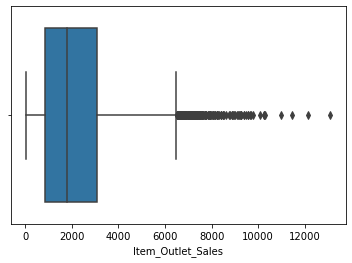

In [13]:
sns.boxplot(df['Item_Outlet_Sales']) #INI HASIL AKHIRNYA NANTI YG DIPREDIKSI 

In [14]:
df['Outlet_Size']= df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [15]:
df['Outlet_Size'].isna().sum()

0

In [ ]:
boleh pake item type yg item visibility

In [16]:
## mengecek apakah ada barang yg visibility nya 0 (tidak bisa dilihat) #apakah isa d blg nan?jd nti pake fil apa dibiarke gpp
df[df['Item_Visibility']==0].sort_values(by='Item_Outlet_Sales',ascending=False)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1450,FDZ20,12.792854,Low Fat,0.0,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
4346,FDY55,12.792854,Low Fat,0.0,Fruits and Vegetables,255.7988,OUT027,1985,Medium,Tier 3,Supermarket Type3,9251.9568
472,FDU56,12.792854,Low Fat,0.0,Fruits and Vegetables,184.7266,OUT027,1985,Medium,Tier 3,Supermarket Type3,8114.7704
4676,DRE49,12.792854,Low Fat,0.0,Soft Drinks,153.8024,OUT027,1985,Medium,Tier 3,Supermarket Type3,7741.9224
7562,FDY39,12.792854,Regular,0.0,Meat,182.0608,OUT027,1985,Medium,Tier 3,Supermarket Type3,7717.9536
...,...,...,...,...,...,...,...,...,...,...,...,...
14166,FDQ19,12.792854,Regular,0.0,Fruits and Vegetables,244.3512,OUT019,1985,Small,Tier 1,Grocery Store,NaN
14171,FDK26,12.792854,Regular,0.0,Canned,187.5240,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14177,FDQ57,7.275000,Low Fat,0.0,Snack Foods,144.5760,OUT013,1987,High,Tier 3,Supermarket Type1,NaN
14184,DRG37,12.792854,Low Fat,0.0,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


Ternyata ada Barang yg tidak terlihat sebanyak 879 row. dan ternyata malah mempunyai penjualan tinggi

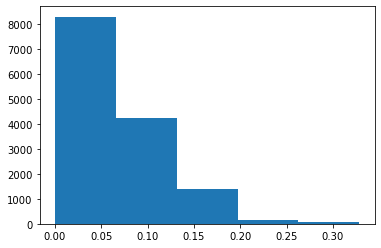

In [26]:
plt.hist(df['Item_Visibility'], bins=5)
plt.show()

In [27]:
#Dari plot diatas bisa di simpulkan bahwa semakin rendah tingkat kelihatannya, barangnya akan semakin banyak (mungkin kecil barangnya)


In [28]:
df[df['Item_Visibility']>=0.3].sort_values(by='Item_Outlet_Sales',ascending=False)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4382,FDG32,12.792854,Low Fat,0.308145,Fruits and Vegetables,222.0772,OUT019,1985,Small,Tier 1,Grocery Store,889.5088
3750,NCZ18,12.792854,Low Fat,0.325781,Household,252.7698,OUT019,1985,Small,Tier 1,Grocery Store,761.0094
3474,FDS12,12.792854,Low Fat,0.304859,Baking Goods,125.4362,OUT019,1985,Small,Tier 1,Grocery Store,755.0172
2251,FDY21,12.792854,Low Fat,0.303743,Snack Foods,196.0110,OUT019,1985,Small,Tier 1,Grocery Store,589.2330
854,FDU13,12.792854,Low Fat,0.328391,Canned,146.0418,OUT019,1985,Small,Tier 1,Grocery Store,588.5672
6622,FDI32,12.792854,Low Fat,0.305305,Fruits and Vegetables,116.6834,OUT019,1985,Small,Tier 1,Grocery Store,460.7336
5732,FDC34,12.792854,Regular,0.302479,Snack Foods,155.4972,OUT019,1985,Small,Tier 1,Grocery Store,311.5944
7603,DRF01,12.792854,Low Fat,0.306543,Soft Drinks,147.3102,OUT019,1985,Small,Tier 1,Grocery Store,291.6204
1805,FDJ56,12.792854,Low Fat,0.321115,Fruits and Vegetables,100.7700,OUT019,1985,Small,Tier 1,Grocery Store,199.7400
7250,FDT24,12.350000,Regular,0.311090,Baking Goods,79.2328,OUT010,1998,Medium,Tier 3,Grocery Store,154.4656


In [29]:
df.sort_values(by='Item_Outlet_Sales',ascending=False) #ternyata blm tentu yg gampang kelihatan malah lebih laku

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7188,NCE42,12.792854,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648
5223,FDQ19,12.792854,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.5600
1450,FDZ20,12.792854,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
4349,FDP33,12.792854,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
6541,FDI50,12.792854,Regular,0.030693,Canned,228.0352,OUT027,1985,Medium,Tier 3,Supermarket Type3,10306.5840
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN


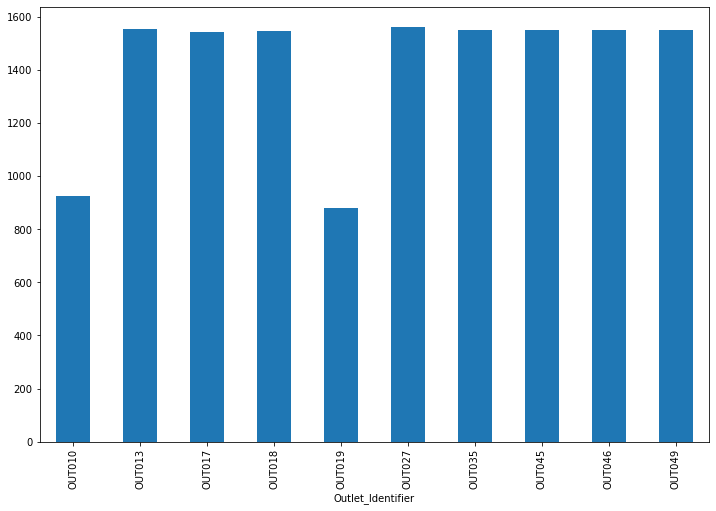

In [30]:
plt.figure(figsize=(12,8))
df.groupby(['Outlet_Identifier']).size().plot(kind='bar')
plt.show()

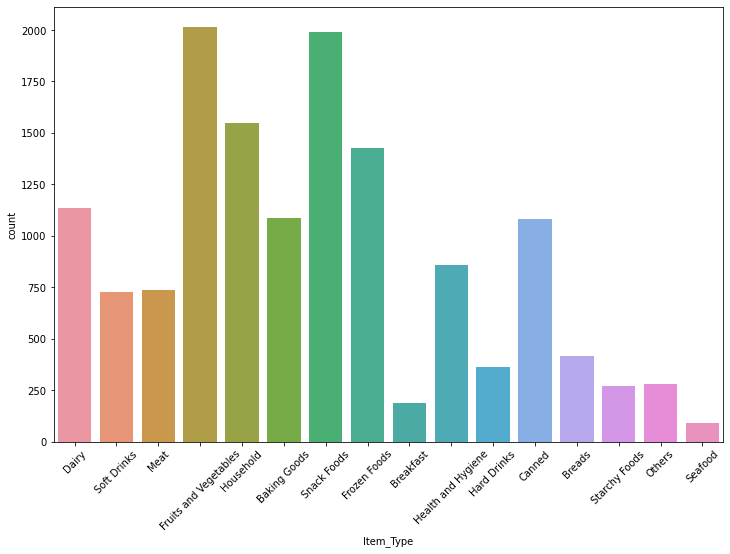

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(df['Item_Type'])
plt.xticks(rotation=45)
plt.show()

Disini bisa dilihat kalo Fruit & Vegetables itu terbanyak, jadi wajar juga kalo dia termasuk paling tinggi dalam penjualan (item Oulet sales)

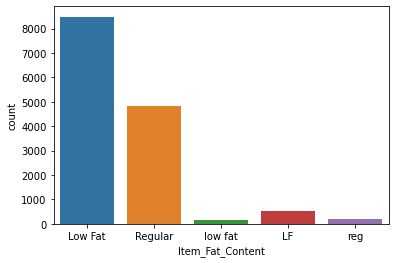

In [18]:
sns.countplot(df['Item_Fat_Content'])
plt.show()

Dari sini bisa diliat ada 5 jenis data yaitu low fat, reguler , lf ,Low fat dan reg. maka ini harus kita betulkan karna dari data informasi pun bisa dilihat bahwa seharusnya item fat content itu menentukan apakah Low Fat / Tidak

In [19]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [20]:
df['Item_Fat_Content'].replace('low fat', "Low Fat",inplace=True)

In [21]:
df['Item_Fat_Content'].replace('LF', "Low Fat",inplace=True)

In [22]:
df['Item_Fat_Content'].replace('reg', "Regular",inplace=True)

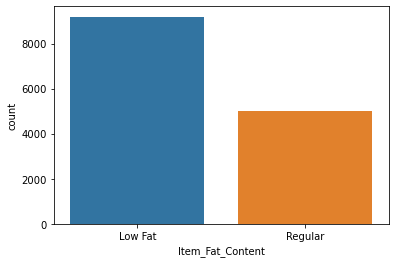

In [23]:
sns.countplot(df['Item_Fat_Content'])
plt.show()

In [33]:
df[df['Item_Type']=='Snack Foods'].sort_values(by='Item_Outlet_Sales',ascending=False)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4349,FDP33,12.792854,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
333,FDN58,12.792854,Regular,0.056597,Snack Foods,230.9984,OUT027,1985,Medium,Tier 3,Supermarket Type3,9267.9360
6409,FDA21,13.650000,Low Fat,0.035931,Snack Foods,184.4924,OUT013,1987,High,Tier 3,Supermarket Type1,9069.5276
3154,FDH10,12.792854,Low Fat,0.049066,Snack Foods,192.4478,OUT027,1985,Medium,Tier 3,Supermarket Type3,8912.3988
2293,FDR45,10.800000,Low Fat,0.029002,Snack Foods,238.6222,OUT045,2002,Medium,Tier 2,Supermarket Type1,8604.7992
...,...,...,...,...,...,...,...,...,...,...,...,...
14189,FDF34,9.300000,Regular,0.014019,Snack Foods,196.9084,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14190,FDZ22,9.395000,Low Fat,0.045270,Snack Foods,82.1250,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14196,FDF46,7.070000,Low Fat,0.094053,Snack Foods,116.0834,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14198,FDW46,13.000000,Regular,0.070411,Snack Foods,63.4484,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN


In [38]:
df.sort_values(by='Item_Outlet_Sales',ascending=False)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7188,NCE42,12.792854,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648
5223,FDQ19,12.792854,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.5600
1450,FDZ20,12.792854,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
4349,FDP33,12.792854,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
6541,FDI50,12.792854,Regular,0.030693,Canned,228.0352,OUT027,1985,Medium,Tier 3,Supermarket Type3,10306.5840
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN


In [36]:
df[df['Item_Type']=='Seafood'].sort_values(by='Item_Outlet_Sales',ascending=False)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2528,FDI57,19.850000,Low Fat,0.054026,Seafood,197.2768,OUT046,1997,Small,Tier 1,Supermarket Type1,6503.5344
8395,FDG21,17.350000,Regular,0.000000,Seafood,150.2050,OUT045,2002,Medium,Tier 2,Supermarket Type1,5992.2000
5042,FDI09,20.750000,Regular,0.129864,Seafood,240.1880,OUT018,2009,Medium,Tier 3,Supermarket Type2,5992.2000
4338,FDH21,12.792854,Low Fat,0.031074,Seafood,157.5604,OUT027,1985,Medium,Tier 3,Supermarket Type3,5704.5744
8328,FDI57,19.850000,Low Fat,0.054246,Seafood,196.0768,OUT018,2009,Medium,Tier 3,Supermarket Type2,5518.1504
...,...,...,...,...,...,...,...,...,...,...,...,...
13520,FDH21,10.395000,Low Fat,0.031352,Seafood,158.6604,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
13556,FDF33,7.970000,Low Fat,0.021518,Seafood,108.2596,OUT013,1987,High,Tier 3,Supermarket Type1,NaN
13643,FDH09,12.600000,Low Fat,0.056306,Seafood,51.3982,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
13664,FDH21,10.395000,Low Fat,0.031225,Seafood,156.9604,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN


Dari data ini berati bisa disimpulkan bahwa ternyata walaupun Item Typenya tidak terlalu banyak , belum tentu mendapatkan penghasilan yg kecil

In [39]:
from dython.nominal import associations

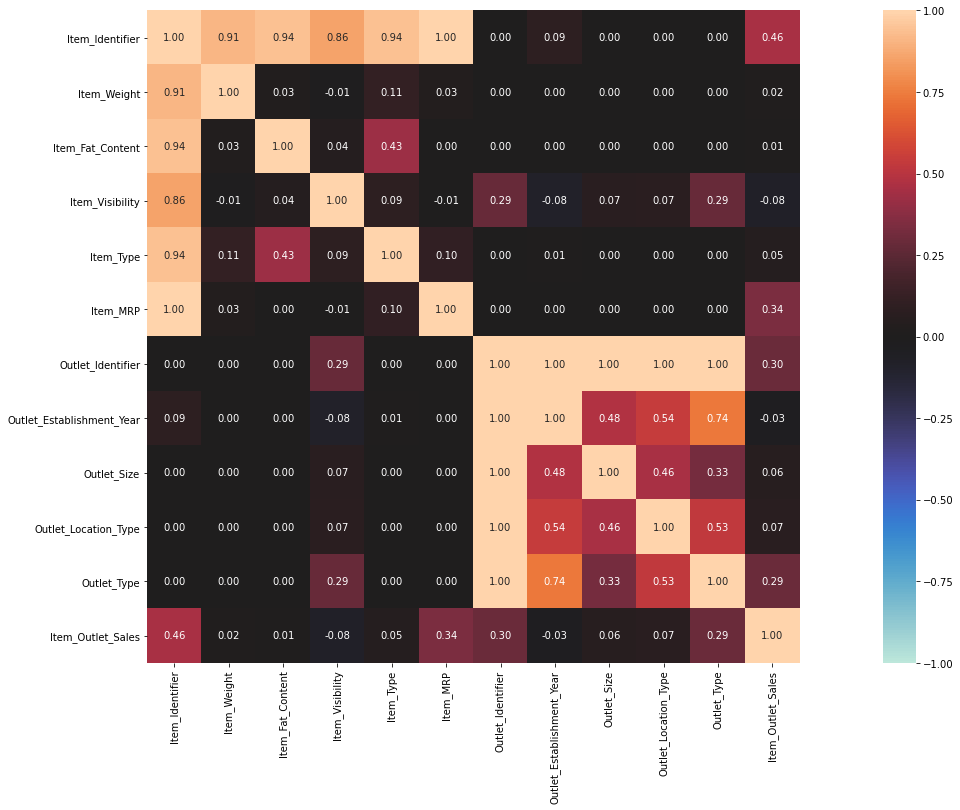

In [40]:
associations(df,figsize=(30,12))
plt.show() #coba pilih salah satu yg kuning

In [41]:
df.sort_values(by='Outlet_Establishment_Year')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8201,FDO03,12.792854,Regular,0.036704,Meat,228.1352,OUT027,1985,Medium,Tier 3,Supermarket Type3,9390.4432
4670,NCN29,12.792854,Low Fat,0.021214,Health and Hygiene,48.2034,OUT019,1985,Small,Tier 1,Grocery Store,97.2068
8090,DRL59,12.792854,Low Fat,0.037161,Hard Drinks,54.2298,OUT019,1985,Small,Tier 1,Grocery Store,161.7894
1996,DRJ47,12.792854,Low Fat,0.044036,Hard Drinks,173.3080,OUT027,1985,Medium,Tier 3,Supermarket Type3,6751.2120
1998,FDZ43,12.792854,Regular,0.056782,Fruits and Vegetables,241.2512,OUT027,1985,Medium,Tier 3,Supermarket Type3,8239.9408
...,...,...,...,...,...,...,...,...,...,...,...,...
11452,FDI48,11.850000,Regular,0.055945,Baking Goods,53.2666,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000
4318,FDF12,8.235000,Low Fat,0.082764,Baking Goods,146.5076,OUT018,2009,Medium,Tier 3,Supermarket Type2,1625.8836
4316,FDA47,10.500000,Regular,0.117149,Baking Goods,164.1210,OUT018,2009,Medium,Tier 3,Supermarket Type2,1794.3310
11460,FDR37,16.500000,Regular,0.066519,Breakfast,183.2292,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000


In [42]:
pd.crosstab(df['Outlet_Establishment_Year'],df['Outlet_Identifier'])

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Establishment_Year,,,,,,,,,,
1985,0,0,0,0,880,1559,0,0,0,0
1987,0,1553,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,1550,0
1998,925,0,0,0,0,0,0,0,0,0
1999,0,0,0,0,0,0,0,0,0,1550
2002,0,0,0,0,0,0,0,1548,0,0
2004,0,0,0,0,0,0,1550,0,0,0
2007,0,0,1543,0,0,0,0,0,0,0
2009,0,0,0,1546,0,0,0,0,0,0


In [43]:
pd.crosstab(df['Outlet_Establishment_Year'],df['Outlet_Location_Type'])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Establishment_Year,,,
1985,880,0,1559
1987,0,0,1553
1997,1550,0,0
1998,0,0,925
1999,1550,0,0
2002,0,1548,0
2004,0,1550,0
2007,0,1543,0
2009,0,0,1546
